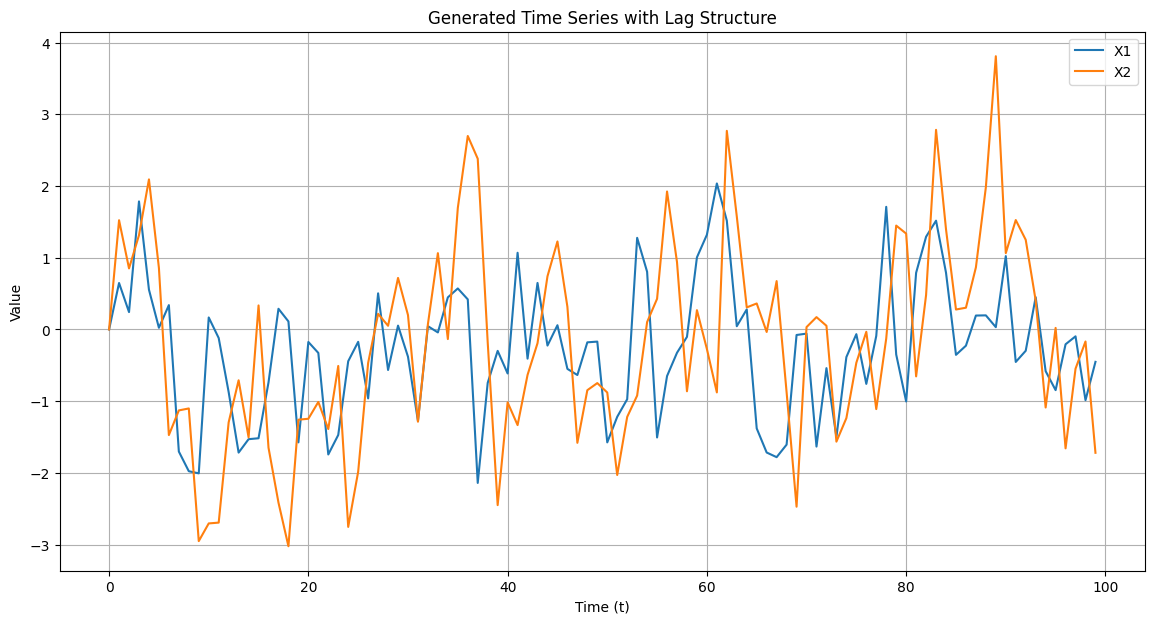

         X1        X2
0  0.000000  0.000000
1  0.647689  1.523030
2  0.241994  0.851222
3  1.785332  1.314043
4  0.554596  2.092247


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Number of observations
n = 100

# Initialize arrays to hold the time series data
X = np.zeros((n, 2))

# Generate noise terms
epsilon = np.random.normal(loc=0, scale=1, size=(n, 2))

# Set the initial values for X1 and X2
X[0, :] = np.zeros(2)

# Coefficients matrix
A = np.array([[0.5, 0.1],
              [0.5, 0.5]])

# Generate the time series based on the given structure
for t in range(1, n):
    X[t, :] = A @ X[t-1, :] + epsilon[t, :]

# Create a DataFrame to hold the time series
df = pd.DataFrame(X, columns=['X1', 'X2'])

# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['X1'], label='X1')
plt.plot(df.index, df['X2'], label='X2')
plt.legend(loc='best')
plt.title('Generated Time Series with Lag Structure')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Display the first few rows of the DataFrame
print(df.head())


In [20]:
A@np.ones(2)

array([0.6, 1. ])

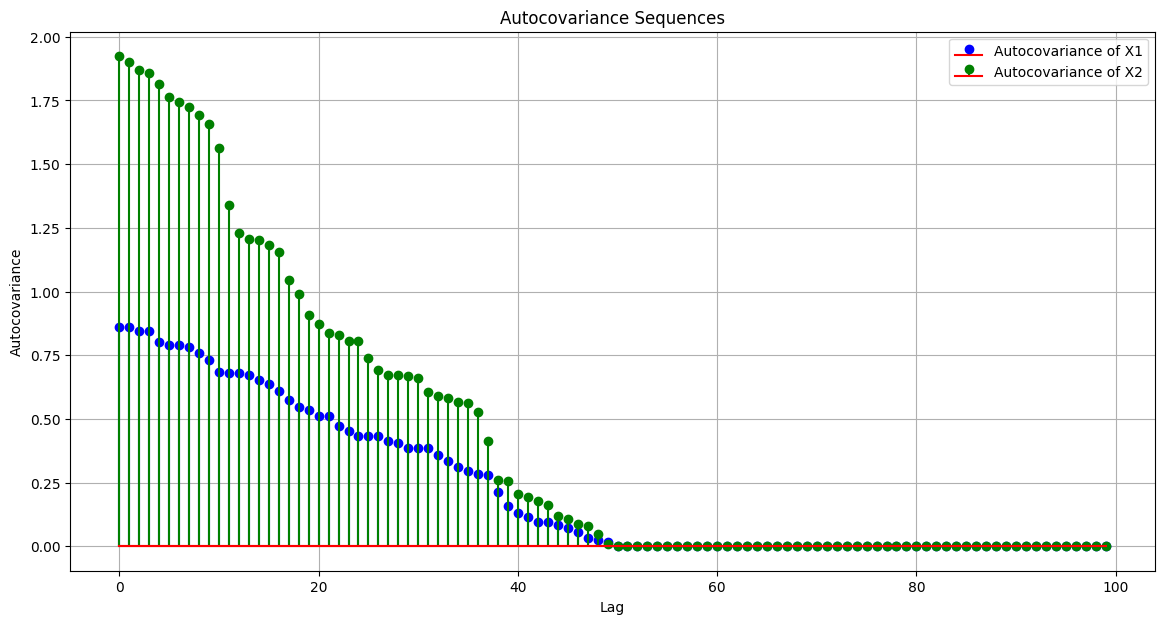

In [22]:
# Function to calculate auto-covariance sequence
def auto_covariance(x, lag):
    n = len(x)
    mean_x = np.mean(x)
    return np.sum((x[:n-lag] - mean_x) * (x[lag:] - mean_x)) / n

# Calculate auto-covariance sequences
max_lag = 99
autocov_X1 = [auto_covariance(df['X1'], lag) for lag in range(max_lag + 1)]
autocov_X2 = [auto_covariance(df['X2'], lag) for lag in range(max_lag + 1)]

# Plot the autocovariance sequences
lags = range(max_lag + 1)
plt.figure(figsize=(14, 7))
plt.stem(lags, autocov_X1, linefmt='b-', markerfmt='bo', basefmt='r-', label='Autocovariance of X1')
plt.stem(lags, autocov_X2, linefmt='g-', markerfmt='go', basefmt='r-', label='Autocovariance of X2')
plt.legend(loc='best')
plt.title('Autocovariance Sequences')
plt.xlabel('Lag')
plt.ylabel('Autocovariance')
plt.grid(True)
plt.show()

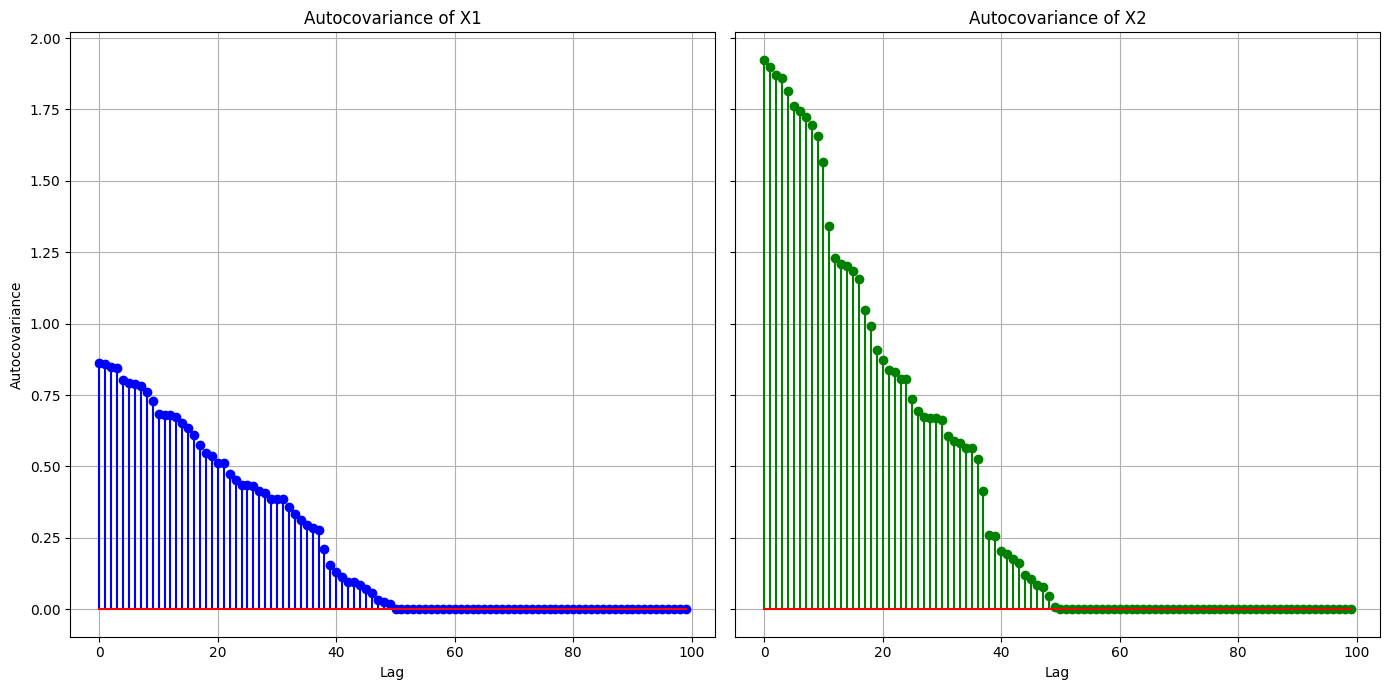

In [23]:
# Plot the autocovariance sequences side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Autocovariance of X1
axs[0].stem(range(max_lag + 1), autocov_X1, linefmt='b-', markerfmt='bo', basefmt='r-')
axs[0].set_title('Autocovariance of X1')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Autocovariance')
axs[0].grid(True)

# Autocovariance of X2
axs[1].stem(range(max_lag + 1), autocov_X2, linefmt='g-', markerfmt='go', basefmt='r-')
axs[1].set_title('Autocovariance of X2')
axs[1].set_xlabel('Lag')
axs[1].grid(True)

plt.tight_layout()
plt.show()

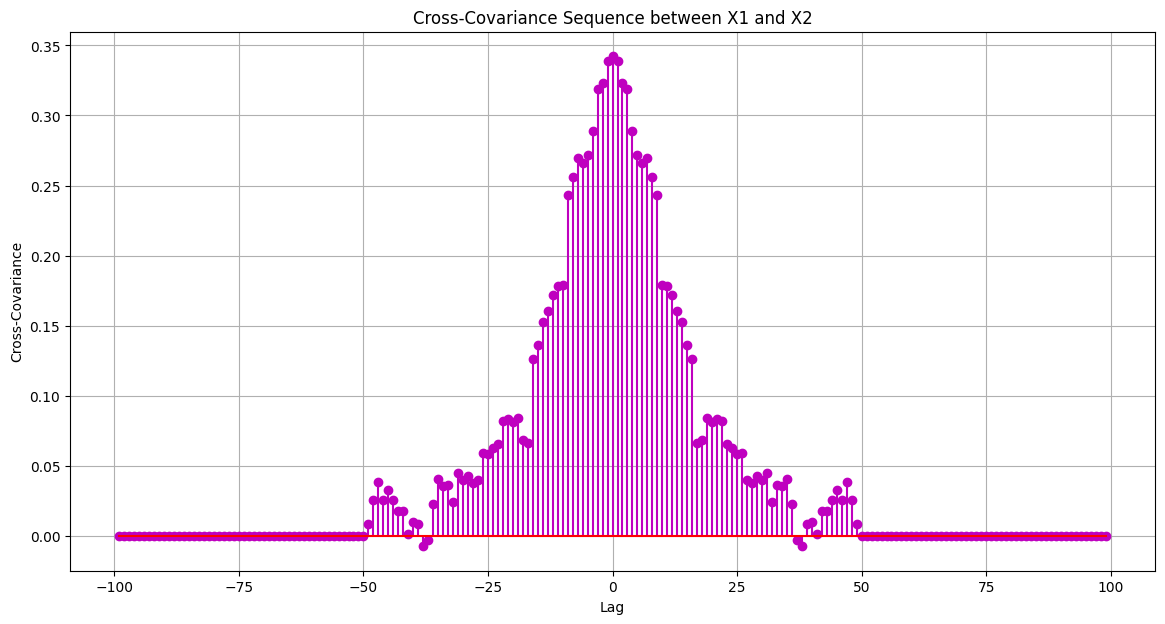

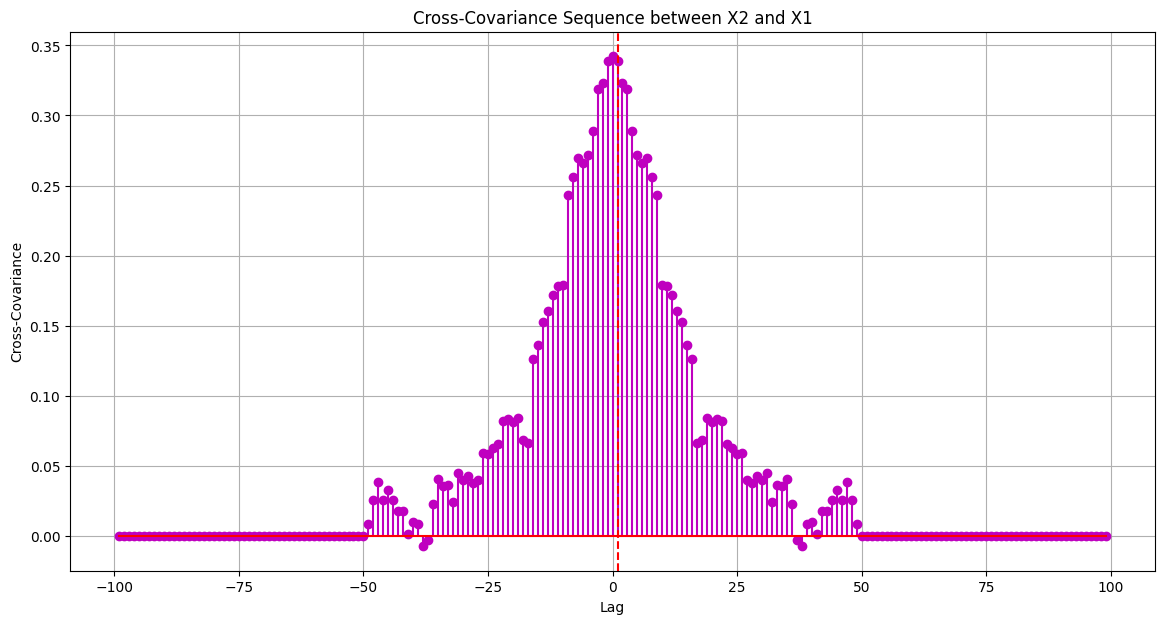

In [24]:
# Function to calculate cross-covariance sequence
def cross_covariance(x, y, lag):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    if lag >= 0:
        return np.sum((x[:n-lag] - mean_x) * (y[lag:] - mean_y)) / n
    else:
        lag = -lag
        return np.sum((x[lag:] - mean_x) * (y[:n-lag] - mean_y)) / n

# Calculate cross-covariance sequence
cross_cov_X1_X2 = [cross_covariance(df['X1'], df['X2'], lag) for lag in range(-max_lag, max_lag + 1)]

# Plot the cross-covariance sequence
plt.figure(figsize=(14, 7))
lags = range(-max_lag, max_lag + 1)
plt.stem(lags, cross_cov_X1_X2, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title('Cross-Covariance Sequence between X1 and X2')
plt.xlabel('Lag')
plt.ylabel('Cross-Covariance')
plt.grid(True)
plt.show()

# Calculate cross-covariance sequence
cross_cov_X2_X1 = [cross_covariance(df['X2'], df['X1'], lag) for lag in range(-max_lag, max_lag + 1)]

# Plot the cross-covariance sequence
plt.figure(figsize=(14, 7))
lags = range(-max_lag, max_lag + 1)
plt.stem(lags, cross_cov_X2_X1, linefmt='m-', markerfmt='mo', basefmt='r-')
plt.title('Cross-Covariance Sequence between X2 and X1')
plt.xlabel('Lag')
plt.ylabel('Cross-Covariance')
plt.grid(True)
# Add a vertical line at x = 2.5
plt.axvline(x=1, color='r', linestyle='--', label='x = 2.5')
plt.show()

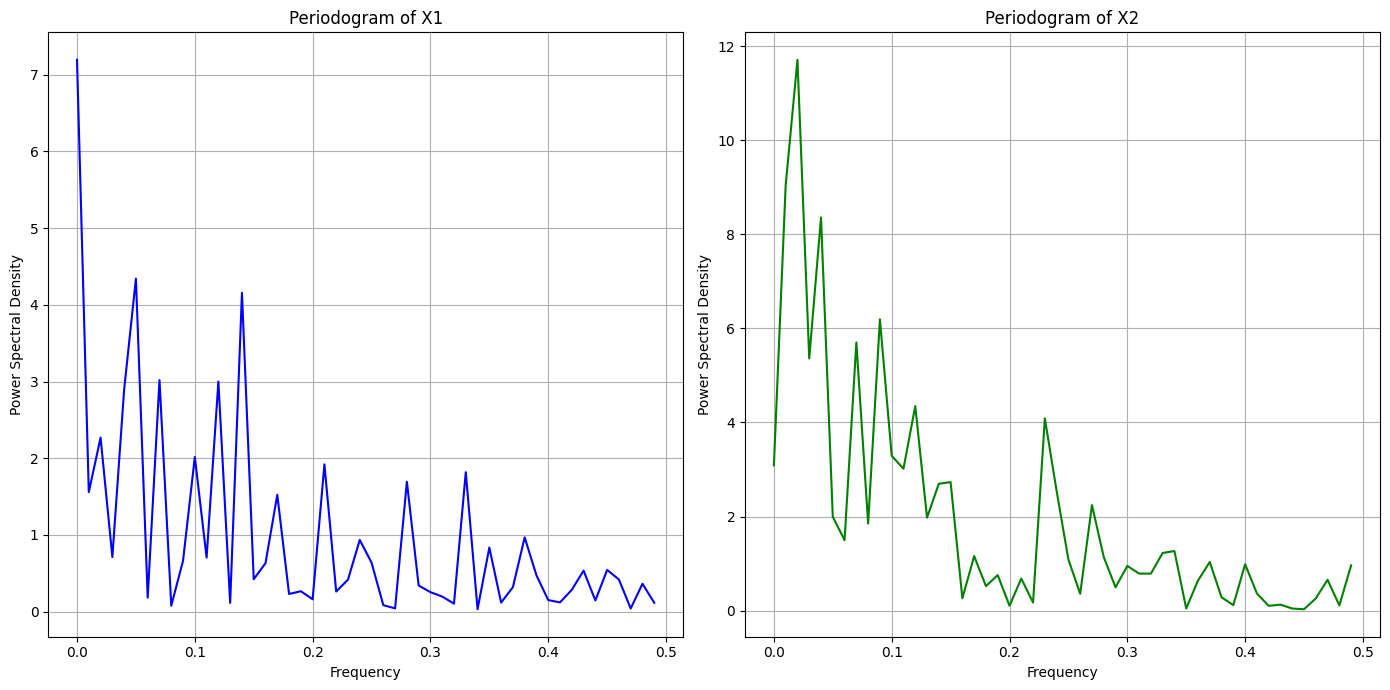

         X1        X2
0  0.000000  0.000000
1  0.647689  1.523030
2  0.241994  0.851222
3  1.785332  1.314043
4  0.554596  2.092247


In [25]:
# Function to calculate periodogram
def periodogram(x):
    n = len(x)
    fft_vals = np.fft.fft(x)
    psd = (1/n) * np.abs(fft_vals)**2
    freqs = np.fft.fftfreq(n)
    return freqs[:n//2], psd[:n//2]  # return only the positive frequencies and corresponding power

# Calculate periodograms
freqs_X1, psd_X1 = periodogram(df['X1'])
freqs_X2, psd_X2 = periodogram(df['X2'])

# Plot the periodograms
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Periodogram of X1
axs[0].plot(freqs_X1, psd_X1, color='b')
axs[0].set_title('Periodogram of X1')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Power Spectral Density')
axs[0].grid(True)

# Periodogram of X2
axs[1].plot(freqs_X2, psd_X2, color='g')
axs[1].set_title('Periodogram of X2')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Power Spectral Density')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Display the first few rows of the DataFrame
print(df.head())

In [26]:
psd_X1

array([7.19562456, 1.55696419, 2.26794935, 0.71032022, 2.895747  ,
       4.34173404, 0.18100218, 3.01774671, 0.07576223, 0.66176463,
       2.0152468 , 0.70397593, 2.99879077, 0.11278601, 4.15659133,
       0.42124794, 0.63081961, 1.52222165, 0.22912538, 0.26465469,
       0.1596572 , 1.91911101, 0.26080191, 0.41560958, 0.93338344,
       0.63804194, 0.08307651, 0.04083718, 1.6928111 , 0.33968142,
       0.25262215, 0.19538288, 0.10268166, 1.81707335, 0.02969464,
       0.8340398 , 0.11661692, 0.31762969, 0.96693573, 0.47152758,
       0.1492149 , 0.11898264, 0.28327239, 0.53395988, 0.14413951,
       0.54272596, 0.41753377, 0.0394934 , 0.36154119, 0.11374004])

50
25


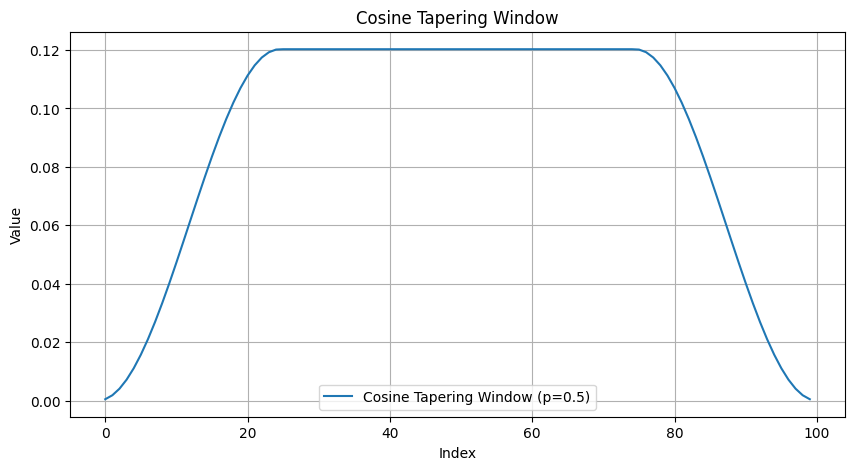

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def cosine_tapering_window(n, p):
    """
    Generate a cosine tapering window of length n with tapering parameter p.

    Parameters:
    - n (int): Length of the tapering window.
    - p (float): Tapering parameter, expressed as a fraction of the length of the window.

    Returns:
    - np.ndarray: Cosine tapering window of length n.
    """
    # Calculate the number of points to taper on each side
    taper_points = int(np.floor(p * n))

    print(taper_points)

    half_taper_points = int(taper_points/2)
    print(half_taper_points)

    # Generate the tapering window
    taper = np.ones(n)
    taper[:half_taper_points] = 0.5 * (1 - np.cos(2 * np.pi * np.arange(1, half_taper_points+1) / (taper_points + 1)))
    taper[-half_taper_points:] = taper[:half_taper_points][::-1]  # Symmetrically copy the tapering window

    # Normalize the tapering window
    taper /= np.sqrt(np.sum(taper ** 2))

    return taper

# Parameters
n = 100
p = 0.5

# Generate the tapering window
taper = cosine_tapering_window(n, p)

# Plot the tapering window
plt.figure(figsize=(10, 5))
plt.plot(taper, label=f'Cosine Tapering Window (p={p})')
plt.title('Cosine Tapering Window')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


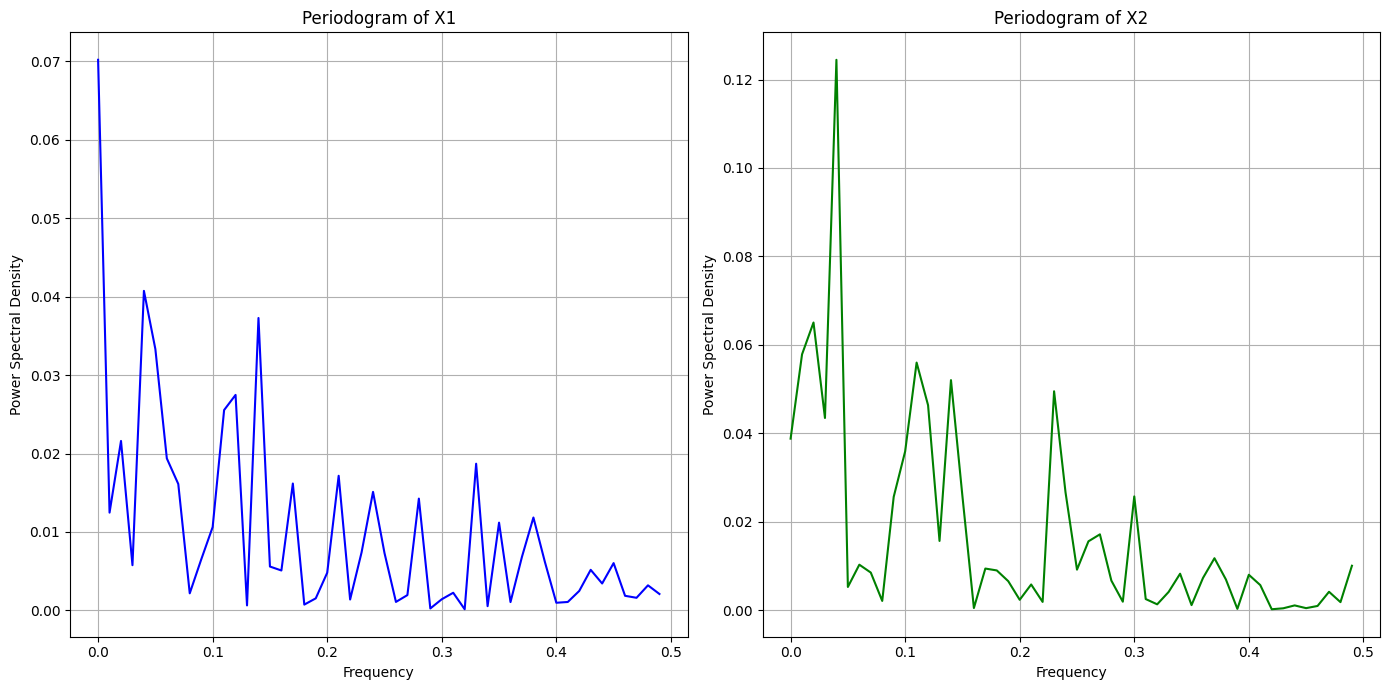

         X1        X2
0  0.000000  0.000000
1  0.647689  1.523030
2  0.241994  0.851222
3  1.785332  1.314043
4  0.554596  2.092247


In [28]:
# Calculate periodograms
freqs_X1, psd_X1 = periodogram(df['X1']*taper)
freqs_X2, psd_X2 = periodogram(df['X2']*taper)

# Plot the periodograms
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Periodogram of X1
axs[0].plot(freqs_X1, psd_X1, color='b')
axs[0].set_title('Periodogram of X1')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Power Spectral Density')
axs[0].grid(True)

# Periodogram of X2
axs[1].plot(freqs_X2, psd_X2, color='g')
axs[1].set_title('Periodogram of X2')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Power Spectral Density')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Display the first few rows of the DataFrame
print(df.head())

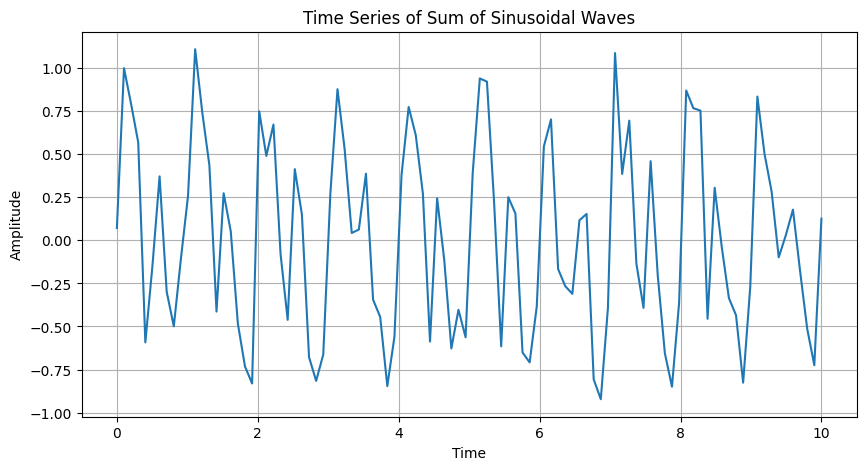

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Number of data points
n = 100

# Time vector
t = np.linspace(0, 10, n)

# Frequencies and corresponding amplitudes
frequencies = [1, 2, 4]  # Frequencies in Hz
amplitudes = [0.5, 0.5, 0.2]  # Amplitudes

# Generate the time series by summing sinusoidal waves
time_series = np.sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t) for i in range(len(frequencies))], axis=0)

# Add noise to the time series
noise_amplitude = 0.2
time_series = time_series + np.random.normal(scale=noise_amplitude, size=n)





# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(t, time_series)
plt.title('Time Series of Sum of Sinusoidal Waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [30]:
X = np.fft.fft(time_series)

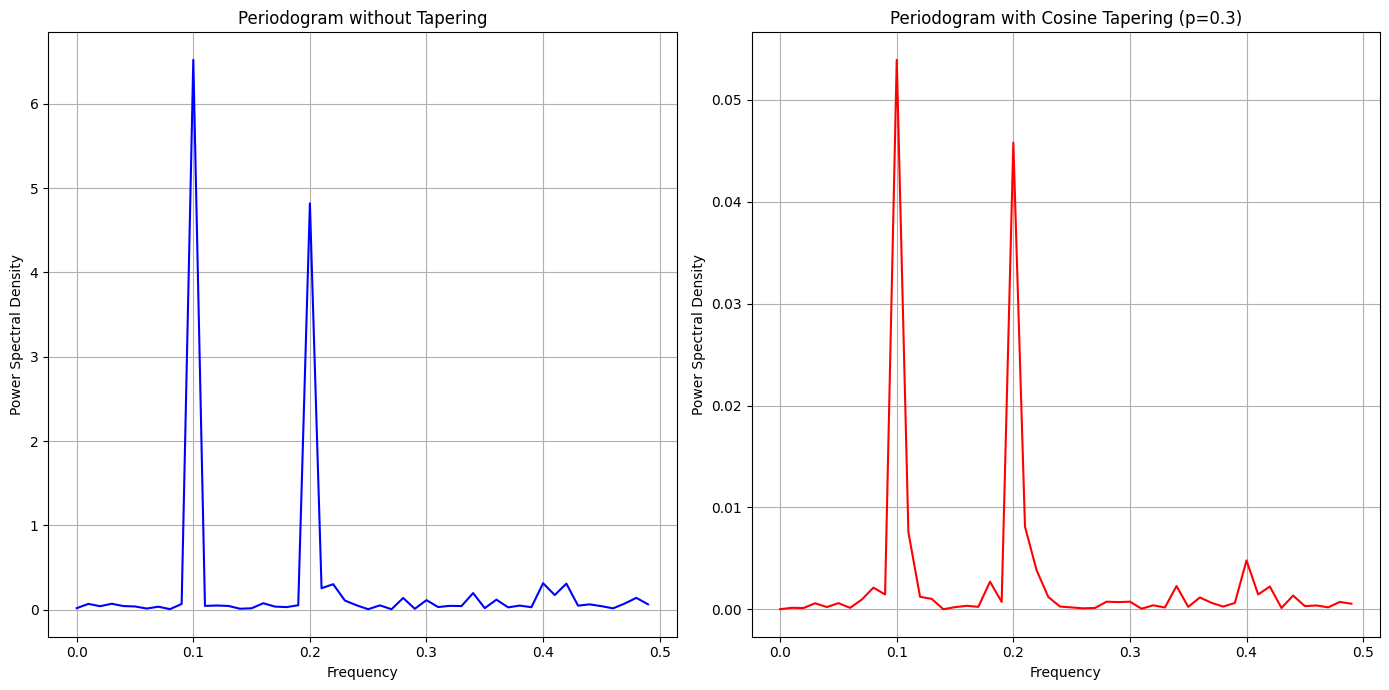

In [31]:
# Calculate periodograms without tapering
frequencies_no_taper, psd_no_taper = periodogram(time_series)

# Calculate periodograms with cosine tapering
p = 0.3  # Tapering parameter
frequencies_with_taper, psd_with_taper = periodogram(time_series*taper)

# Plot the periodograms
plt.figure(figsize=(14, 7))

# Periodogram without tapering
plt.subplot(1, 2, 1)
plt.plot(frequencies_no_taper, psd_no_taper, color='b')
plt.title('Periodogram without Tapering')
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.grid(True)

# Periodogram with cosine tapering
plt.subplot(1, 2, 2)
plt.plot(frequencies_with_taper, psd_with_taper, color='r')
plt.title(f'Periodogram with Cosine Tapering (p={p})')
plt.xlabel('Frequency')
plt.ylabel('Power Spectral Density')
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
# Time vector
t = np.linspace(0, 10, n)

# Frequencies and corresponding amplitudes
frequencies_2 = [2, 6, 10]  # Frequencies in Hz
amplitudes_2 = [0.5, 0.5, 0.2]  # Amplitudes

# Generate the time series by summing sinusoidal waves
time_series_2 = np.sum([amplitudes_2[i] * np.sin(2 * np.pi * frequencies_2[i] * t) for i in range(len(frequencies_2))], axis=0)

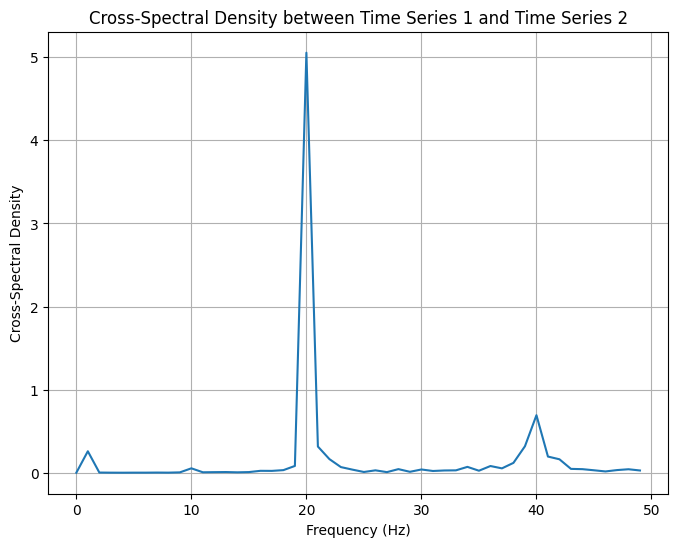

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def cross_spectral_density(x, y, fs):
    """
    Compute the cross-spectral density between two time series.

    Parameters:
    - x (array-like): Time series data 1.
    - y (array-like): Time series data 2.
    - fs (float): Sampling frequency.

    Returns:
    - frequencies (array-like): Frequencies.
    - cross_spectra (array-like): Cross-spectral density.
    """
    # Compute Fourier transforms of the time series
    X = np.fft.fft(x)
    Y = np.fft.fft(y)

    # Compute frequencies
    frequencies = np.fft.fftfreq(len(x), 1 / fs)

    # Compute cross-spectral density
    cross_spectra = X * np.conj(Y) / len(x)

    return frequencies[:n//2], cross_spectra[:n//2]



# Compute cross-spectral density
frequencies, cross_spectra = cross_spectral_density(time_series, time_series_2, 100)

# Plot the cross-spectral density
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(cross_spectra))
plt.title('Cross-Spectral Density between Time Series 1 and Time Series 2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Cross-Spectral Density')
plt.grid(True)
plt.show()


In [34]:
def coherence(x, y, fs):
    """
    Compute the coherence between two time series.

    Parameters:
    - x (array-like): Time series data 1.
    - y (array-like): Time series data 2.
    - fs (float): Sampling frequency.

    Returns:
    - frequencies (array-like): Frequencies.
    - coherence (array-like): Coherence.
    """
    # Compute cross-spectral density
    frequencies, cross_spectra = cross_spectral_density(x, y, fs)

    # Compute auto-spectral density
    _, auto_spectra_x = periodogram(x)
    _, auto_spectra_y = periodogram(y)

    # Compute coherence
    coherence = np.abs(cross_spectra)**2 / (auto_spectra_x * auto_spectra_y)

    return frequencies, coherence


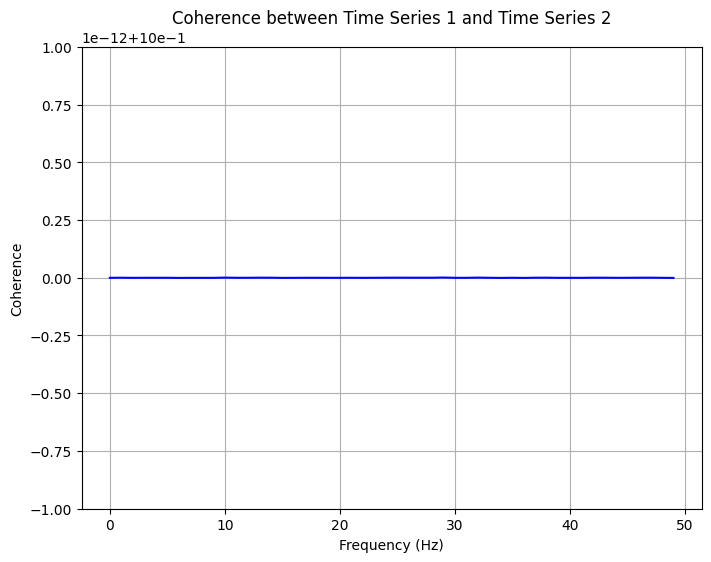

In [35]:
# Calculate coherence
frequencies, coherence = coherence(time_series, time_series_2, 100)

# Plot the coherence
plt.figure(figsize=(8, 6))
plt.plot(coherence, color='b')
plt.title('Coherence between Time Series 1 and Time Series 2')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.grid(True)
plt.show()

# Cross-spectra and coherence

In [36]:
def sinusoidal_tapers(num_samples, num_tapers):
    """
    Generate sinusoidal tapers.
    
    Parameters:
    num_samples (int): Number of time samples.
    num_tapers (int): Number of sinusoidal tapers.
    
    Returns:
    tapers (np.ndarray): Array of sinusoidal tapers with shape (num_tapers, num_samples).
    """
    
    if num_tapers >= num_samples:
        raise ValueError(f'More tapers than samples: \n T:{num_tapers} >= N:{num_samples}')
    
    tapers = np.zeros((num_tapers, num_samples))
    for k in range(1, num_tapers + 1):
        n = np.arange(num_samples)
        tapers[k-1, :] = np.sqrt(2 / (num_samples + 1)) * np.sin(np.pi * k * (n + 1) / (num_samples + 1))
    return tapers

def sinusoidal_multitaper_sdf_matrix(X, num_tapers=5, sampling_frequency=1.0):
    """
    Calculate the sinusoidal multitaper spectral density matrix estimate for a multivariable time series.

    Parameters:
    X (np.ndarray): Input multivariable time series with shape (num_variables, num_samples).
    num_tapers (int): Number of sinusoidal tapers. Default is 5.
    sampling_frequency (float): Sampling frequency of the time series. Default is 1.0.

    Returns:
    freqs (np.ndarray): Frequencies at which the SDF is estimated.
    SDF (np.ndarray): Spectral density function matrix with shape (num_variables, num_variables, num_freqs).
    """
    num_variables, num_samples = X.shape

    # Generate sinusoidal tapers
    tapers = sinusoidal_tapers(num_samples, num_tapers)
    
    print(tapers.shape)
    
    # Frequencies at which to estimate the SDF
    freqs = np.fft.fftfreq(num_samples, d=1/sampling_frequency)
    num_freqs = len(freqs)
    
    print("aaaa", num_freqs)
    
    # Initialize SDF matrix
    SDF = np.zeros((num_variables, num_variables, num_freqs), dtype=complex)
    
    # Multi-taper spectral estimation
    for k in range(num_tapers):
        # Taper the data
        tapered_data = X * tapers[k]
        
        # Fourier transform of tapered data
        tapered_fft = np.fft.fft(tapered_data, axis=1)
        
        # Accumulate the periodogram estimates
        for i in range(num_variables):
            for j in range(num_variables):
                new = tapered_fft[i, :] * np.conjugate(tapered_fft[j, :])
                SDF[i, j, :] += new
    
    # Normalize by the number of tapers and samples
    SDF /= (num_tapers * num_samples)
    
    # Only return the positive frequencies
    positive_freqs = freqs[:num_samples // 2]
    SDF = SDF[:, :, :num_samples // 2]
    
    return positive_freqs, SDF

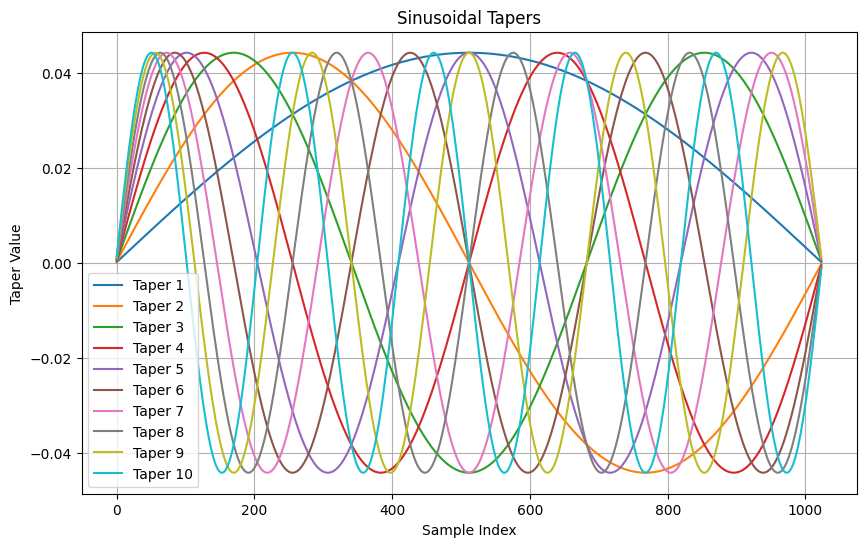

In [37]:
def plot_sinusoidal_tapers(num_samples, num_tapers):
    """
    Plot sinusoidal tapers.
    
    Parameters:
    num_samples (int): Number of time samples.
    num_tapers (int): Number of sinusoidal tapers.
    """
    tapers = sinusoidal_tapers(num_samples, num_tapers)
    
    plt.figure(figsize=(10, 6))
    for k in range(num_tapers):
        plt.plot(tapers[k], label=f'Taper {k+1}')
    
    plt.title('Sinusoidal Tapers')
    plt.xlabel('Sample Index')
    plt.ylabel('Taper Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
num_samples = 1024
num_tapers = 10
plot_sinusoidal_tapers(num_samples, num_tapers)

In [38]:



def generate_time_series(A, T, shift=1, seed=None):
    """
    Generate a time series based on the matrix of weights A, random noise, and a shift parameter.
    
    Parameters:
    A (numpy.ndarray): The coefficient matrix.
    T (int): The number of time steps.
    shift (int): The shift parameter (how many steps back to use for the current calculation).
    seed (int): The seed for random number generation.
    
    Returns:
    numpy.ndarray: The generated time series.
    """
    
    if seed is not None:
        np.random.seed(seed)  # For reproducibility

    num_series = A.shape[0]
    # Initialize the time series arrays (including the initial values)
    x = np.zeros((num_series, T))

    # Generate random noise (assuming normal distribution)
    epsilon = np.random.normal(0, 1, (num_series, T))

    # Iterate to calculate the time series values
    for t in range(shift, T):
        x[:, t] = A @ x[:, t-shift] + epsilon[:, t]

    return x

def plot_time_series(x):
    """
    Plot the time series on one graph.
    
    Parameters:
    x (numpy.ndarray): The generated time series.
    """
    T = x.shape[1]
    time = np.arange(T)

    plt.figure(figsize=(16, 6))

    plt.plot(time, x[0], label='x1_t')
    plt.plot(time, x[1], label='x2_t', color='orange')
    plt.plot(time, x[2], label='x3_t', color='green')

    plt.title('Time Series')
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)

    plt.show()
    

def check_roots_inside_unit_circle(a1, a2, a3, b1, b2, b3, c1, c2, c3):
    """
    Check if the roots of the given polynomial lie inside the unit circle.

    Parameters:
    a1, a2, a3: Coefficients a with subscripts
    b1, b2, b3: Coefficients b with subscripts
    c1, c2, c3: Coefficients c with subscripts

    Returns:
    bool: True if all roots lie inside the unit circle, False otherwise.
    roots (numpy.ndarray): Roots of the polynomial.
    """
    # Calculate the coefficients of the polynomial
    coeff_0 = 1 + b3 * c2
    coeff_1 = -(a1 + b2 + c3 + a1 * b3 * c2)
    coeff_2 = a1 * b2 + a1 * c3 + b2 * c3 - a2 * b1 + a2 * b3 * c1 - a3 * b1 * c2 - a3 * c1
    coeff_3 = -a1 * b2 * c3 + a2 * b1 * c3 + a3 * c1 * b2
    
    # Polynomial coefficients in decreasing order of powers
    coefficients = [coeff_3, coeff_2, coeff_1, coeff_0]

    # Find the roots of the polynomial
    roots = np.roots(coefficients)
    
    # Check if all roots lie inside the unit circle
    outside_unit_circle = np.all(np.abs(roots) > 1)
    
    return outside_unit_circle, roots

def calculate_cross_spectrum(x, y, sampling_interval=1.0):
    """
    Calculate the cross spectrum of two time series.

    Parameters:
    x (numpy.ndarray): First time series.
    y (numpy.ndarray): Second time series.
    sampling_interval (float): Sampling interval of the time series.

    Returns:
    f (numpy.ndarray): Frequencies corresponding to the cross spectrum.
    cross_spectrum (numpy.ndarray): Cross spectrum of the two time series.
    """
    # Compute the FFT of both time series
    X = np.fft.fft(x)
    Y = np.fft.fft(y)
    # Get the corresponding frequencies
    N = len(x)

    # Compute the cross spectrum
    cross_spectrum = X * np.conj(Y) / N


    f = np.fft.fftfreq(N, sampling_interval)

    return f, cross_spectrum #f[:N//2], cross_spectrum[:N//2]

def calculate_spectral_matrix(x, sampling_interval=1.0):
    """
    Calculate the spectral matrix for a set of time series.

    Parameters:
    x (numpy.ndarray): Matrix containing time series as rows.
    sampling_interval (float): Sampling interval of the time series.

    Returns:
    frequencies (numpy.ndarray): Frequencies corresponding to the spectral matrix.
    spectral_matrix (numpy.ndarray): Spectral matrix for each frequency.
    """
    num_series = x.shape[0]
    N = x.shape[1]

    # Initialize the spectral matrix
    spectral_matrix = np.zeros((num_series, num_series, N), dtype=complex)

    # Calculate the cross spectra for each pair of time series
    for i in range(num_series):
        for j in range(num_series):
            _, cross_spectrum = calculate_cross_spectrum(x[i], x[j], sampling_interval)
            spectral_matrix[i, j, :] = cross_spectrum

    # Get the corresponding frequencies
    frequencies = np.fft.fftfreq(N, sampling_interval)

    return frequencies, spectral_matrix

def calculate_power_spectral_density(X, noise_level=1e-10):
    """
    Calculate the power spectral density matrix \hat{S}^{(P)}(f) for a given time series matrix X,
    with added noise to ensure the matrix is not singular.
    
    Parameters:
    X (numpy.ndarray): A 2D array where each row represents a time series.
    noise_level (float): The standard deviation of the Gaussian noise to be added.
    
    Returns:
    S_P (numpy.ndarray): The power spectral density matrix for each frequency.
    frequencies (numpy.ndarray): The frequency bins corresponding to the power spectral density.
    """
    N = X.shape[1]  # Number of time steps
    sqrt_N = np.sqrt(N)
    
    # Compute the FFT for each time series
    W = np.fft.fft(X, axis=1)[:,:N//2] / sqrt_N
    
    print(W.shape)
    
    # Add small Gaussian noise to W to avoid singularity
    noise = np.random.normal(scale=noise_level, size=W.shape)
    W += noise
    
    # Compute the frequencies
    frequencies = np.fft.fftfreq(N)
    
    # Initialize the power spectral density matrix
    S_P = np.zeros((X.shape[0], X.shape[0], N), dtype=np.complex_)
    
    # Calculate the power spectral density matrix for each frequency
    for i in range(N//2):
        W_f = W[:, i]  # FFT values for the ith frequency
        S_P[:, :, i] = np.outer(W_f, np.conj(W_f))  # W(f) * W^H(f)
    
    return frequencies, S_P

def invert_spectral_matrix(spectral_matrix, noise_level=1e-10):
    """
    Invert the spectral matrix for each frequency, adding a small noise to avoid singularity.

    Parameters:
    spectral_matrix (numpy.ndarray): Spectral matrix for each frequency.
    noise_level (float): The standard deviation of the Gaussian noise to be added to avoid singularity.

    Returns:
    inv_spectral_matrix (numpy.ndarray): Inverse of the spectral matrix for each frequency.
    """
    num_series, _, N = spectral_matrix.shape

    # Initialize the inverse spectral matrix
    inv_spectral_matrix = np.zeros_like(spectral_matrix, dtype=complex)

    # Invert the spectral matrix for each frequency
    for k in range(N):
        # Add a small noise to the diagonal elements
        noise = np.eye(num_series) * noise_level
        inv_spectral_matrix[:, :, k] = np.linalg.inv(spectral_matrix[:, :, k] + noise)

    return inv_spectral_matrix

def calculate_coherence(inv_spectral_matrix):
    """
    Calculate coherence using the spectral matrix and its inverse.

    Parameters:
    inv_spectral_matrix (numpy.ndarray): Inverse of the spectral matrix for each frequency.

    Returns:
    coherence (numpy.ndarray): Coherence for each pair of time series for each frequency.
    """
    num_series, _, N = inv_spectral_matrix.shape

    # Initialize the coherence matrix
    coherence = np.zeros((num_series, num_series, N))

    for k in range(N):
        for i in range(num_series):
            for j in range(num_series):
                coherence[i, j, k] = np.abs(inv_spectral_matrix[i, j, k]) ** 2 / (
                        np.abs(inv_spectral_matrix[i, i, k]) * np.abs(inv_spectral_matrix[j, j, k]))

    return coherence

import numpy as np

def calculate_power_spectral_density(X, taper=None, noise_level=1e-10):
    """
    Calculate the power spectral density matrix \hat{S}^{(P)}(f) for a given time series matrix X,
    with added noise to ensure the matrix is not singular.
    
    Parameters:
    X (numpy.ndarray): A 2D array where each row represents a time series.
    taper (numpy.ndarray): A 1D array to be multiplied element-wise to each time series.
    noise_level (float): The standard deviation of the Gaussian noise to be added.
    
    Returns:
    S_P (numpy.ndarray): The power spectral density matrix for each frequency.
    frequencies (numpy.ndarray): The frequency bins corresponding to the power spectral density.
    """
    N = X.shape[1]  # Number of time steps
    sqrt_N = np.sqrt(N)
    
    # Apply taper to each time series if provided
    if taper is not None:
        if taper.shape[0] != N:
            raise ValueError("The taper vector must have the same length as the time series.")
        X = X * taper 
        
    
    # Compute the FFT for each time series
    W = np.fft.fft(X, axis=1)[:,:N//2]
    
    # Add small Gaussian noise to W to avoid singularity
    # noise = np.random.normal(scale=noise_level, size=W.shape)
    # W += noise
    
    # Compute the frequencies
    frequencies = np.fft.fftfreq(N)[:N//2]
    
    # Initialize the power spectral density matrix
    S_P = np.zeros((X.shape[0], X.shape[0], N//2), dtype=np.complex_)
    
    # Calculate the power spectral density matrix for each frequency
    for i in range(N//2):
        W_f = W[:, i]  # FFT values for the ith frequency
        if taper is not None:
            S_P[:, :, i] = np.outer(W_f, np.conj(W_f))   # W(f) * W^H(f)
        else:
            S_P[:, :, i] = np.outer(W_f, np.conj(W_f)) / N
    return frequencies, S_P


def is_var_stationary(A):
    """
    Check if a VAR(p) process is stationary.

    Parameters:
    A (list of np.ndarray): List of coefficient matrices for the VAR process.

    Returns:
    bool: True if the process is stationary, False otherwise.
    """
    p = len(A)  # Order of the VAR process
    k = A[0].shape[0]  # Number of dimensions
    
    # Construct the companion matrix
    companion_matrix = np.zeros((k * p, k * p))
    
    for i in range(p):
        companion_matrix[i * k:(i + 1) * k, :k] = A[i]
    
    if p > 1:
        companion_matrix[k:, :-k] = np.eye(k * (p - 1))
    
    print('Companion matrix: ')    
    print(companion_matrix)
    
    # Calculate the eigenvalues of the companion matrix
    eigenvalues = np.linalg.eigvals(companion_matrix)
    
    print('Eigenvalues:')
    print(eigenvalues)
    
    # Check if all eigenvalues are within the unit circle
    return np.all(np.abs(eigenvalues) < 1)


def generate_var_process(A, num_samples, burn_in=100, seed=None):
    """
    Generate a sample of a VAR(p) process.

    Parameters:
    A (list of np.ndarray): List of coefficient matrices for the VAR process.
    num_samples (int): Number of samples to generate.
    burn_in (int): Number of initial samples to discard to reduce the effect of initial values.
    seed (int or None): Random seed for reproducibility.

    Returns:
    np.ndarray: Generated sample of the VAR process.
    """
    if seed is not None:
        np.random.seed(seed)
    
    p = len(A)  # Order of the VAR process
    k = A[0].shape[0]  # Number of dimensions
    
    total_samples = num_samples + burn_in
    
    # Initialize the time series array
    X = np.zeros((k, total_samples))
    
    # Generate the white noise (innovation) terms
    epsilon = np.random.normal(size=(k, total_samples))
    
    # Simulate the VAR process
    for t in range(p, total_samples):
        X[:, t] = epsilon[:, t]
        for i in range(1, p+1):
            X[:, t] += A[i-1] @ X[:, t-i]
    
    # Discard the burn-in period and return the remaining samples
    return X[:, burn_in:]

def is_var_process_stationary(coef_matrices):
    """
    Check if a VAR(p) process is stationary given its coefficient matrices.
    
    Parameters:
    - coef_matrices: List of numpy arrays, where each array represents the coefficients
                     for each lag in the VAR(p) model.
    
    Returns:
    - Boolean indicating whether the VAR(p) process is stationary.
    """
    p = len(coef_matrices)  # Order of the VAR process
    n = coef_matrices[0].shape[0]  # Dimension of the VAR process
    
    # Initialize the companion matrix
    companion_matrix = np.zeros((n * p, n * p))
    
    # Fill the upper part of the companion matrix with the negated coefficients
    for i in range(p):
        companion_matrix[:n, n * i:n * (i + 1)] = -coef_matrices[i]
    
    # Fill the lower part of the companion matrix with identity matrices
    for i in range(1, p):
        companion_matrix[n * i:n * (i + 1), n * (i - 1):n * i] = np.eye(n)
    
    # Compute the eigenvalues of the companion matrix
    eigenvalues = np.linalg.eigvals(companion_matrix)
    
    print('Companion matrix: ')    
    print(companion_matrix)
    
    print("eigenvalues")
    print(eigenvalues)
    
    # Check if all eigenvalues are outside the unit circle
    return np.all(np.abs(eigenvalues) < 1)

Companion matrix: 
[[0.5  0.5  0.1 ]
 [0.25 0.5  0.  ]
 [0.25 0.   0.5 ]]
Eigenvalues:
[0.88729833 0.11270167 0.5       ]
True
Companion matrix: 
[[-0.5  -0.5  -0.1 ]
 [-0.25 -0.5  -0.  ]
 [-0.25 -0.   -0.5 ]]
eigenvalues
[-0.88729833 -0.11270167 -0.5       ]
True


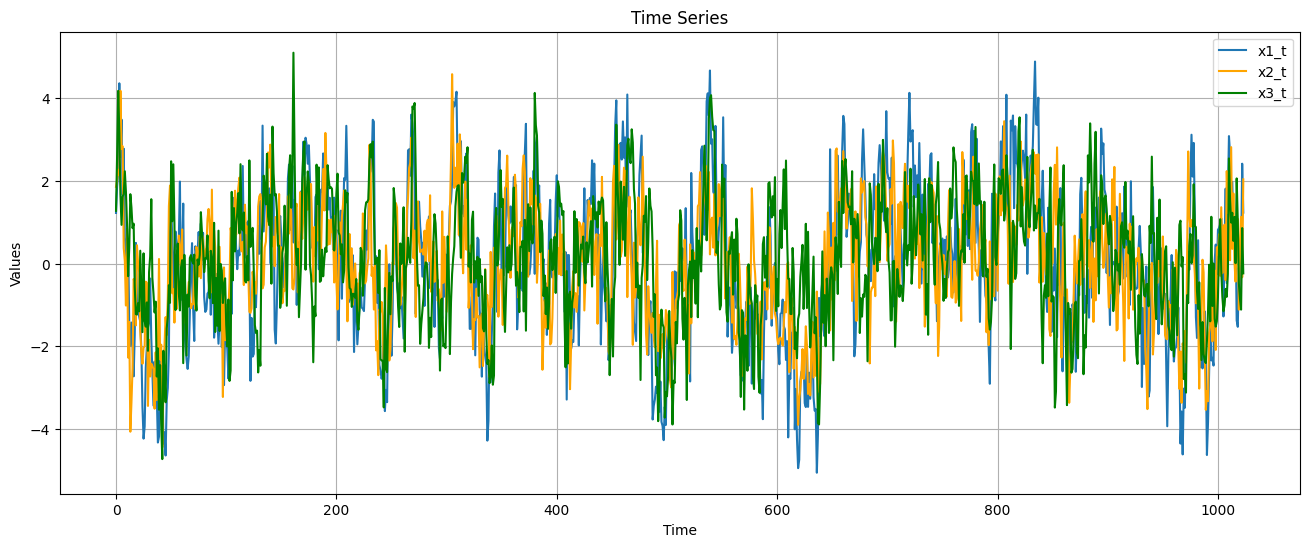

In [246]:
# Example:
a1, a2, a3 = 0.5, 0.5, 0.1
b1, b2, b3 = 0.25, 0.5, 0.0
c1, c2, c3 = 0.25, 0.0, 0.5
# 
# a1, a2, a3 = 0.5, 0.0, 0.0
# b1, b2, b3 = 0.0, 0.5, 0.0
# c1, c2, c3 = 0.0, 0.0, 0.5

# a1, a2, a3 = 0.5, 0.0, 0.5
# b1, b2, b3 = 0.5, 0.2, 0.0
# c1, c2, c3 = 0.5, 0.0, 0.2

# a1, a2, a3 = 0.5, 0.0, 0.0
# b1, b2, b3 = 0.5, 0.0, 0.0
# c1, c2, c3 = 0.5, 0.0, 0.0

# a1, a2, a3 = 0.5, 0.0, 0.3
# b1, b2, b3 = 0.5, 0.1, 0.0
# c1, c2, c3 = 0.5, 0.5, 0.1

# a1, a2, a3 = 0.9, 0, 0
# b1, b2, b3 = 0.0, 0.7, 0.0
# c1, c2, c3 = 0.0, 0.0, 0.7

# inside, roots = check_roots_inside_unit_circle(a1, a2, a3, b1, b2, b3, c1, c2, c3)

# print("Roots of the polynomial:", roots)
# print("All roots outside the unit circle:", inside)

# Example usage:
A = np.array([
    [a1, a2, a3],
    [b1, b2, b3],
    [c1, c2, c3]
])

# A_list = [np.zeros([3,3]), A, A*0.1]
A_list = [A]

print(is_var_stationary(A_list))
print(is_var_process_stationary(A_list))

T = 1024
shift = 1

# Generate the time series
# x = generate_time_series(A, T, shift, seed=None)
x = generate_var_process(A_list, T)

# Plot the time series
plot_time_series(x)

In [247]:
np.zeros([3,3])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

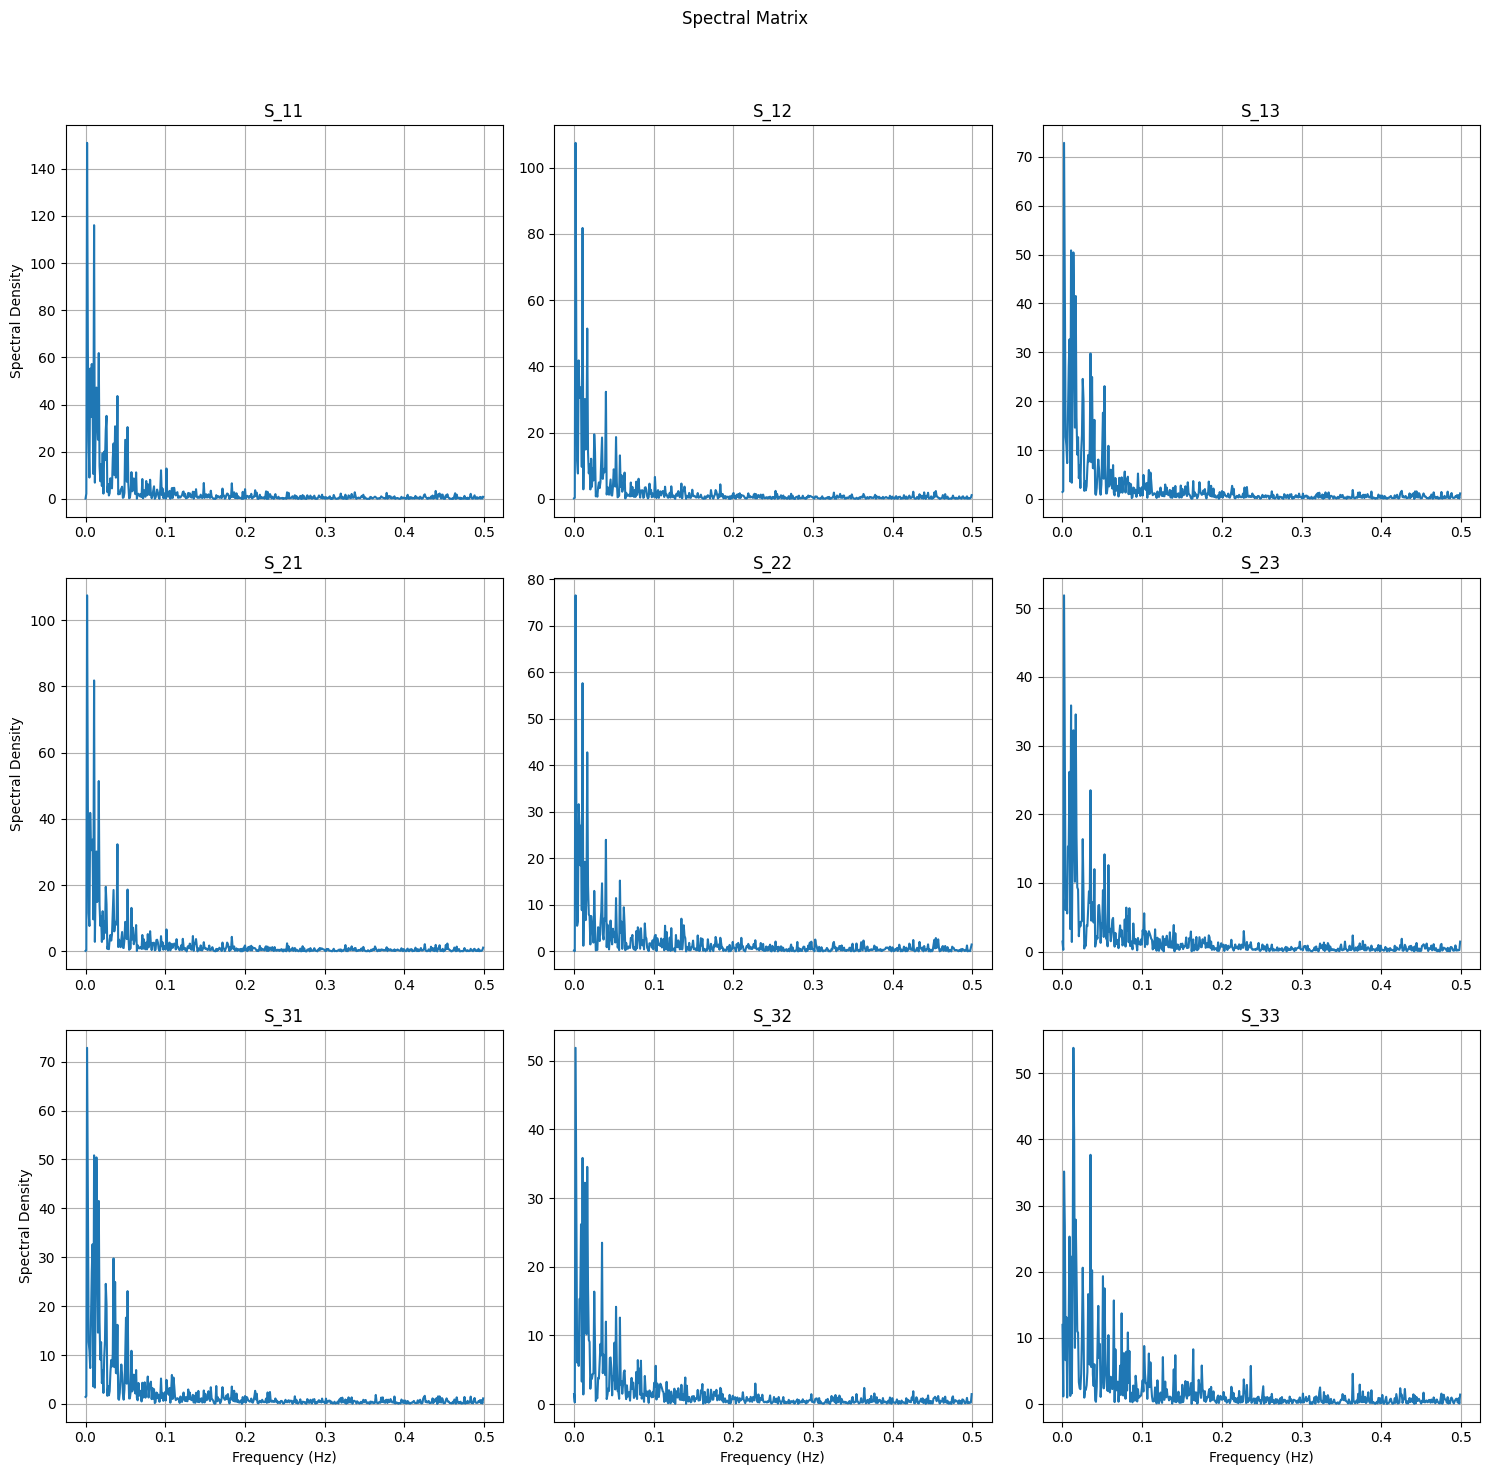

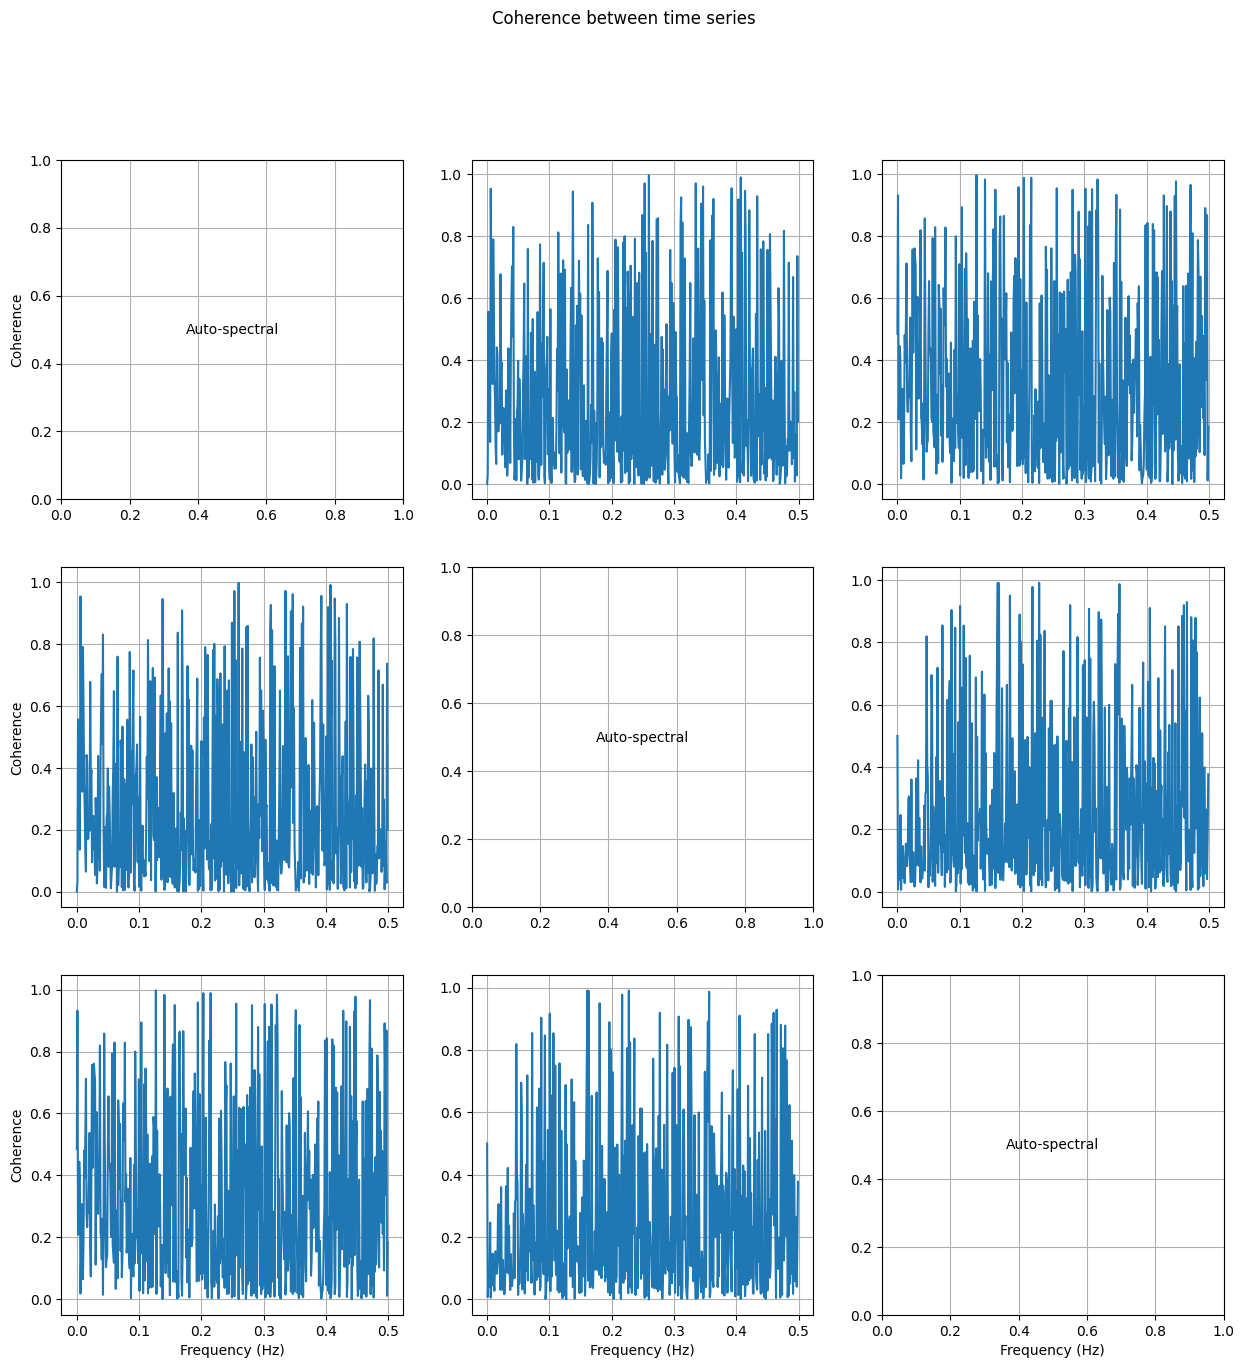

In [248]:
# cos_taper = cosine_tapering_window(T, 0.9)

# frequencies, spectral_matrix = calculate_spectral_matrix(x)
frequencies, spectral_matrix = calculate_power_spectral_density(x, taper=None)
length = len(x[0])

# Plot the spectral matrix for each pair of time series in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        if i != j:
            axes[i, j].plot(frequencies[:length//2], np.abs(spectral_matrix[i, j, :])[:length//2])
            axes[i, j].set_title(f'S_{i+1}{j+1}')
        else:
            axes[i, j].plot(frequencies[:length//2], np.abs(spectral_matrix[i, j, :])[:length//2])
            axes[i, j].set_title(f'S_{i+1}{i+1}')

        if i == 2:
            axes[i, j].set_xlabel('Frequency (Hz)')
        if j == 0:
            axes[i, j].set_ylabel('Spectral Density')

        axes[i, j].grid(True)
		
plt.suptitle('Spectral Matrix')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


inv_spectral_matrix = invert_spectral_matrix(spectral_matrix)
coherence = calculate_coherence(inv_spectral_matrix)



# Plot the coherence for each pair of time series in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        if i != j:
            axes[i, j].plot(frequencies[:length//2], coherence[i, j, :][:length//2])
        else:
            axes[i, j].text(0.5, 0.5, 'Auto-spectral', horizontalalignment='center', verticalalignment='center', transform=axes[i, j].transAxes)

        if i == 2:
            axes[i, j].set_xlabel('Frequency (Hz)')
        if j == 0:
            axes[i, j].set_ylabel('Coherence')

        axes[i, j].grid(True)

plt.suptitle('Coherence between time series')
plt.show()

In [249]:
def spectral_density_function_VAR(A, Sigma, num_points=512):
    """
    Calculate the spectral density function of a VAR process.

    Parameters:
    A (list of np.ndarray): List of coefficient matrices for the VAR process.
    Sigma (np.ndarray): Covariance matrix of the white noise.
    num_points (int): Number of frequency points to calculate the SDF.

    Returns:
    frequencies (np.ndarray): Frequencies at which the SDF is calculated.
    sdf (np.ndarray): Spectral density function values.
    """
    p = len(A)  # Order of the VAR process
    k = A[0].shape[0]  # Number of dimensions
    frequencies = np.linspace(0, 0.5, num_points)  # Normalized frequency (0 to 0.5 corresponds to Nyquist frequency)
    sdf = np.zeros((k, k, num_points), dtype=complex)
    
    I_k = np.eye(k, dtype=np.complex_)  # Identity matrix of size k
          
    for freq_idx, freq in enumerate(frequencies):
        exp_sum = I_k.copy()
        for matrix_idx in range(1, p+1):
            omega = -2j * np.pi * matrix_idx * freq
            exp_sum -= A[matrix_idx-1] * np.exp(omega)
        
        inv_exp_sum = np.linalg.inv(exp_sum)
        if freq_idx == 1:
            print(exp_sum)
            print(inv_exp_sum)
        sdf[:, :, freq_idx] = (1 / (2 * np.pi)) * inv_exp_sum @ Sigma @ np.linalg.inv(np.conj(exp_sum.T))
        if freq_idx == 1:
            print((1 / (2 * np.pi)) * inv_exp_sum @ Sigma @ np.linalg.inv(np.conj(exp_sum.T)))
    return frequencies, sdf

In [250]:
def spectral_density_matrix_var1(A1, Sigma_u, num_frequencies=1024):
    """
    Calculate the spectral density matrix S(ν) for a VAR(1) process.
    
    Parameters:
    A1 (numpy.ndarray): The coefficient matrix of the VAR(1) process (k x k).
    Sigma_u (numpy.ndarray): The covariance matrix of the white noise (k x k).
    num_frequencies (int): The number of frequency points to compute in the range [0, 0.5].
    
    Returns:
    S (numpy.ndarray): The spectral density matrix for each frequency (k x k x num_frequencies).
    frequencies (numpy.ndarray): The frequency bins corresponding to the spectral density.
    """
    k = A1.shape[0]
    frequencies = np.linspace(0, 0.5, num_frequencies)
    S = np.zeros((k, k, num_frequencies), dtype=np.complex_)
    
    for idx, nu in enumerate(frequencies):
        omega =  -2j * np.pi * nu
        H_inv =  np.eye(k, dtype=np.complex_) - A1 * np.exp(omega)
        H = np.linalg.inv(H_inv)
        S[:, :, idx] = (1 / (2 * np.pi)) * H @ Sigma_u @ np.linalg.inv(np.conj(H_inv.T))
    
    return frequencies, S

In [251]:
def log_window_estimator(time_series, window_size):
    """
    Calculate the estimate of the spectral density function (SDF) matrix using log-window estimator.

    Parameters:
    time_series (np.ndarray): Multivariate time series data of shape (num_series, num_samples).
    window_size (int): Size of the window for the log-window estimator.

    Returns:
    sdf_matrix (np.ndarray): Estimated SDF matrix of shape (num_series, num_series, num_frequencies).
    frequencies (np.ndarray): Array of frequency values.
    """
    num_series, num_samples = time_series.shape
    num_frequencies = num_samples // 2 
    
    # Perform FFT on the time series data
    fft_result = np.fft.fft(time_series, axis=1) / np.sqrt(num_samples)
    sdf_matrix = np.zeros((num_series, num_series, num_frequencies), dtype=complex)
    
    # Frequency vector
    frequencies = np.fft.fftfreq(num_samples)[:num_frequencies]
    
    # Calculate periodogram
    periodogram = np.einsum('ik,jk->ijk', fft_result[:, :num_frequencies], np.conj(fft_result[:, :num_frequencies]))

    # Log-window smoothing
    for f in range(num_frequencies):
        log_window = np.exp(-0.5 * ((np.arange(num_frequencies) - f) / window_size) ** 2)
        log_window /= np.sum(log_window)
        for i in range(num_series):
            for j in range(num_series):
                sdf_matrix[i, j, f] = np.sum(periodogram[i, j, :] * log_window)

    return frequencies, sdf_matrix

def plot_sdf_with_theoretical(frequencies, empirical_sdf, theoretical_sdf, log_scale=False, 
                              title='Spectral Matrix with Theoretical Spectrum'):
    """
    Plot the SDF for each pair of dimensions with theoretical spectrum.

    Parameters:
    frequencies (np.ndarray): Array of frequency values.
    empirical_sdf (np.ndarray): Empirical spectral density function matrix.
    theoretical_sdf (np.ndarray): Theoretical spectral density function matrix.
    title (str): Title of the plot.
    log_scale (bool): If True, use logarithmic scale for the y-axis.
    """
    # Calculate the length of the spectral density functions
    length = empirical_sdf.shape[2]
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for i in range(3):
        for j in range(3):
            if i != j:
                axes[i, j].plot(frequencies, np.abs(empirical_sdf[i, j, :])/10, label='Empirical')
                axes[i, j].plot(frequencies, np.abs(theoretical_sdf[i, j, :]), label='Theoretical', linestyle='--')
                axes[i, j].set_title(f'S_{i+1}{j+1}')
            else:
                axes[i, j].plot(frequencies, np.abs(empirical_sdf[i, j, :])/10, label='Empirical')
                axes[i, j].plot(frequencies, np.abs(theoretical_sdf[i, j, :]), label='Theoretical', linestyle='--')
                axes[i, j].set_title(f'S_{i+1}{i+1}')

            if log_scale:
                axes[i, j].set_yscale('log')

            if i == 2:
                axes[i, j].set_xlabel('Frequency (Hz)')
            if j == 0:
                axes[i, j].set_ylabel('Spectral Density')

            axes[i, j].grid(True)
            axes[i, j].legend()

    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

(1023, 1024)
aaaa 1024
[[ 0.50000945+0.00307395j -0.49999055+0.00307395j -0.09999811+0.00061479j]
 [-0.24999528+0.00153697j  0.50000945+0.00307395j  0.        +0.j        ]
 [-0.24999528+0.00153697j  0.        +0.j          0.50000945+0.00307395j]]
[[4.98897351-0.21461073j 4.98576924-0.2759251j  0.99715385-0.05518502j]
 [2.49288462-0.13796255j 4.49079236-0.18089142j 0.49818115-0.03371931j]
 [2.49288462-0.13796255j 2.49090574-0.16859656j 2.49806777-0.04601417j]]
[[8.09578306-5.34128241e-17j 5.63490216-2.83003821e-02j
  4.36492649+3.41545144e-02j]
 [5.63490216+2.83003821e-02j 4.24669419+2.63634306e-17j
  2.97559063+3.90309909e-02j]
 [4.36492649-3.41545144e-02j 2.97559063-3.90309909e-02j
  2.97763038-3.01688567e-17j]]


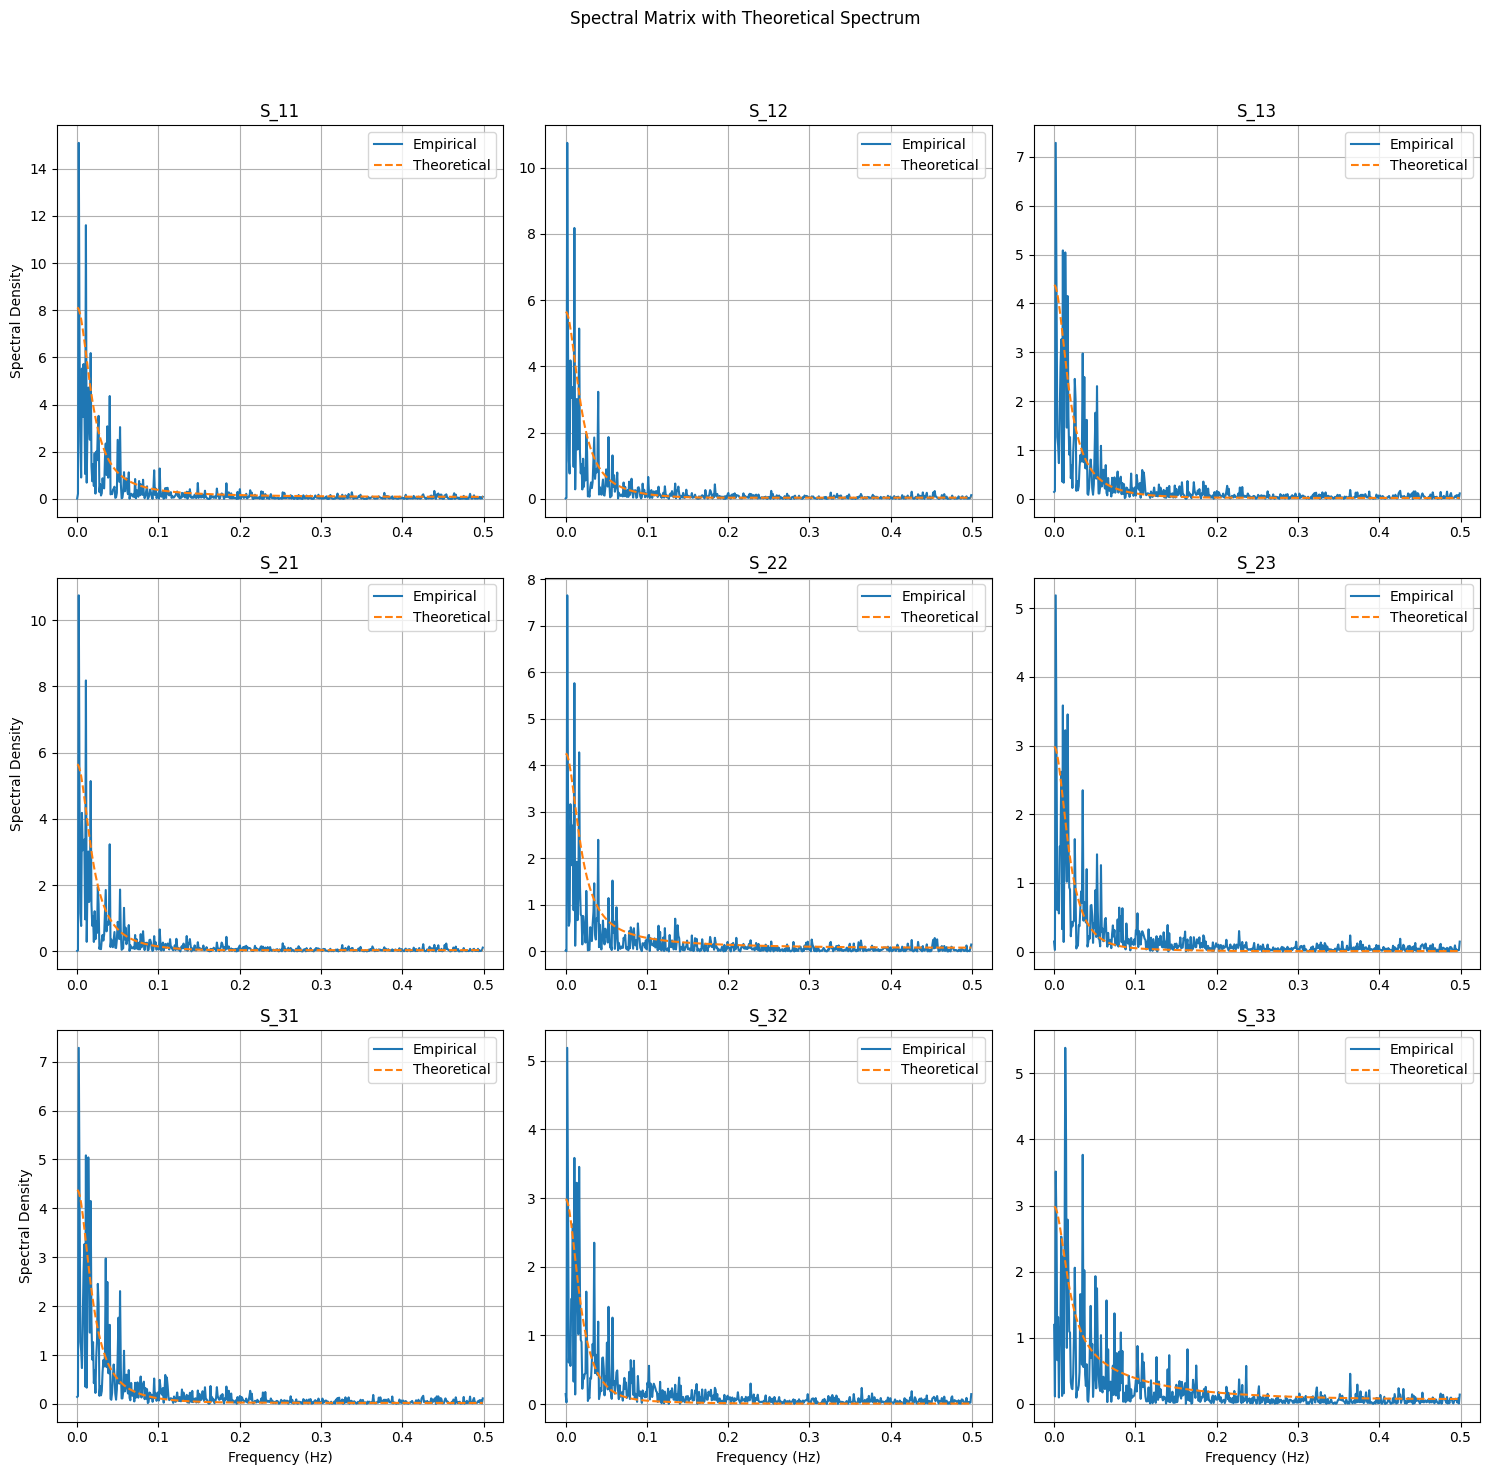

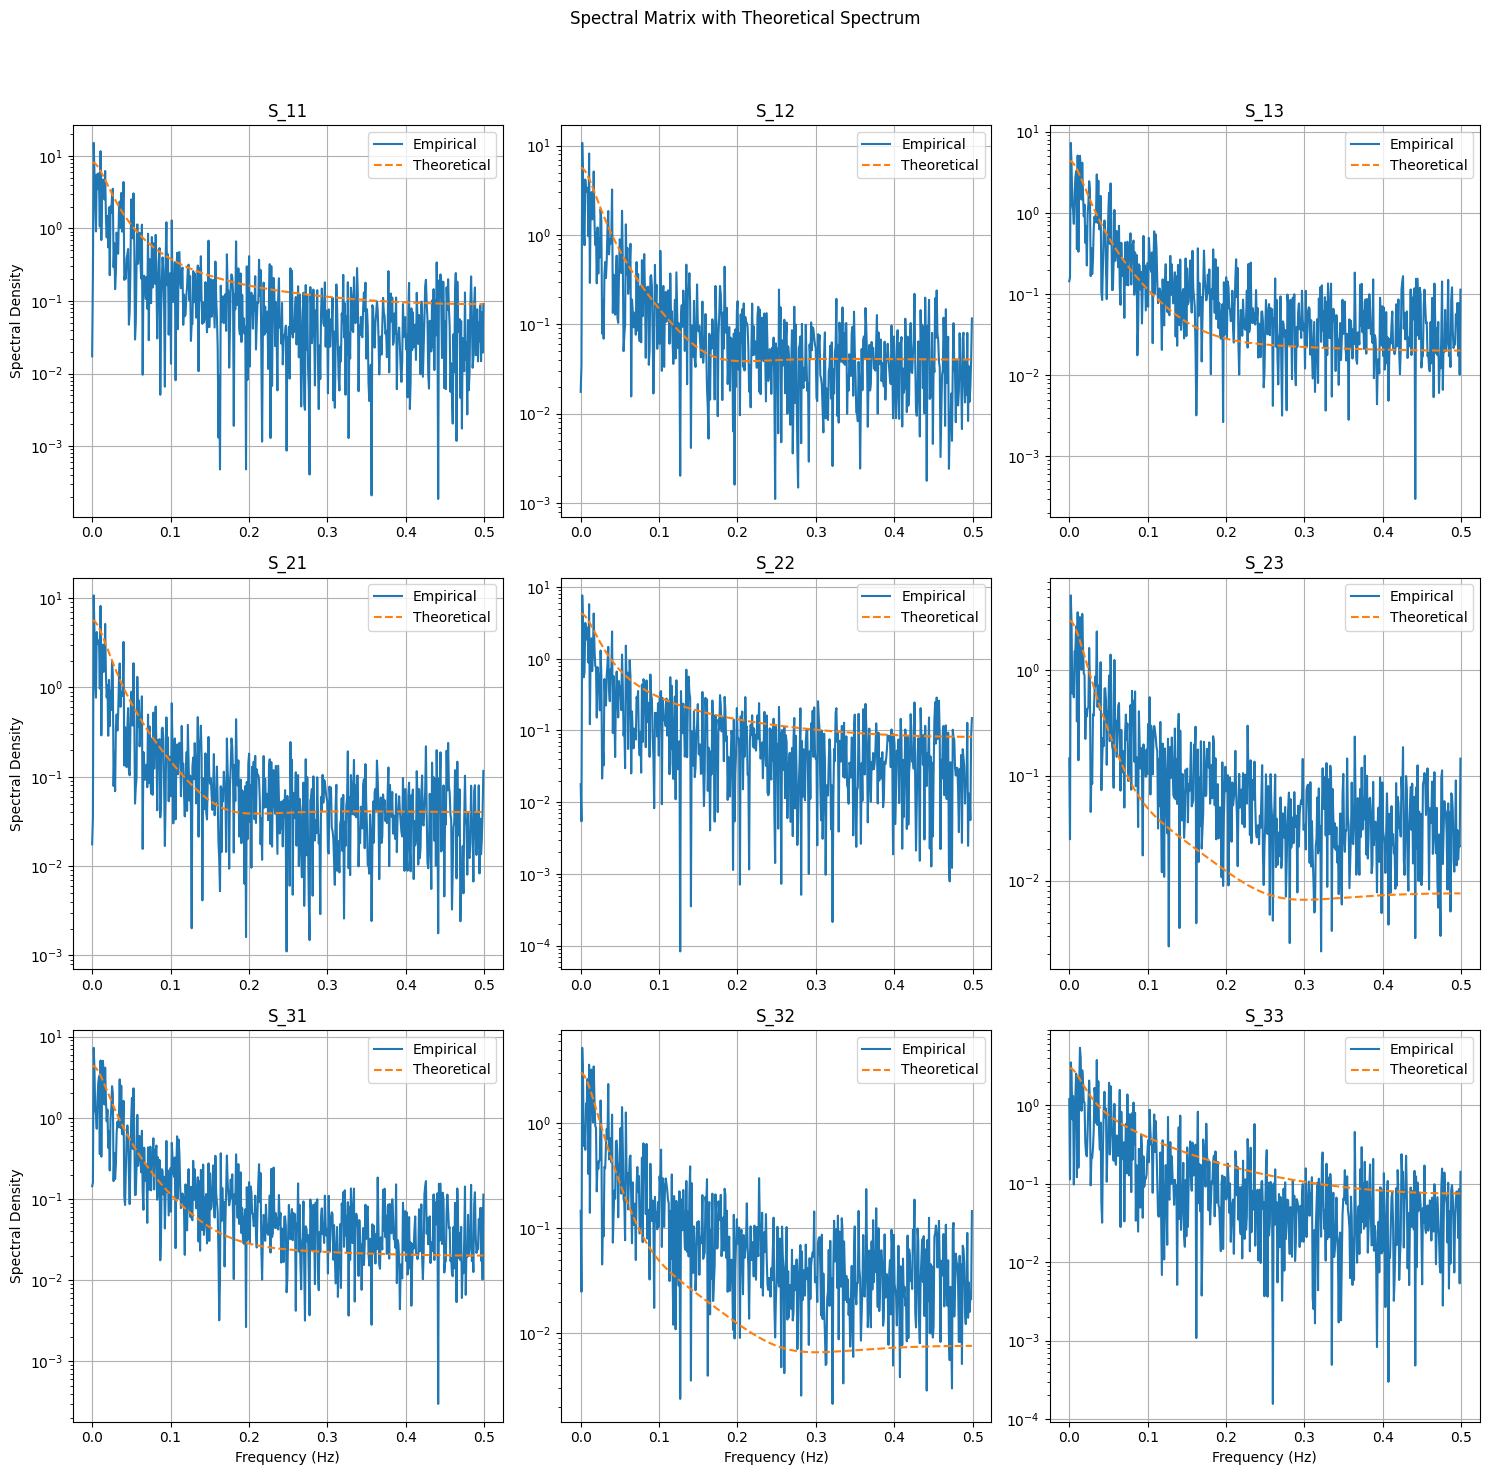

In [252]:

# frequencies, spectral_matrix = calculate_power_spectral_density(x, taper=None)

frequencies, empirical_sdf = sinusoidal_multitaper_sdf_matrix(x, num_tapers = 1023)

# frequencies, empirical_sdf = log_window_estimator(x, window_size=1000)

_, theory_spectrum = spectral_density_function_VAR(A_list, np.eye(A.shape[0]), 512)
# _, theory_spectrum = spectral_density_matrix_var1(A_list[0], np.eye(A.shape[0]), 512)

plot_sdf_with_theoretical(frequencies, spectral_matrix, theory_spectrum, log_scale = False)
plot_sdf_with_theoretical(frequencies, spectral_matrix, theory_spectrum, log_scale = True)

In [253]:
theory_spectrum.shape

(3, 3, 512)

In [254]:
np.mean(x, axis=1)

array([0.01299364, 0.01318952, 0.10804836])

In [255]:
theory_spectrum[1,1,:]

array([4.25739473+0.00000000e+00j, 4.24669419+2.63634306e-17j,
       4.21492821+4.62158299e-17j, 4.16307765+1.71430626e-17j,
       4.09269434-3.80228459e-17j, 4.00578871-1.05682394e-16j,
       3.90469399-2.00838174e-17j, 3.79192299-4.98113081e-17j,
       3.67003219-2.57502525e-16j, 3.5415042 +1.91727706e-16j,
       3.40865555-1.24264502e-16j, 3.27357219+1.17159297e-16j,
       3.13807152-4.49498364e-17j, 3.00368757+5.08511842e-17j,
       2.87167428+7.64939628e-17j, 2.74302197+4.45160293e-18j,
       2.61848227+5.84628274e-18j, 2.49859744-3.79669148e-17j,
       2.38373114-1.00913956e-16j, 2.27409848+8.15828706e-17j,
       2.1697939 -7.12219145e-17j, 2.0708161 +3.40685624e-17j,
       1.97708977-1.08851007e-17j, 1.88848393+5.85799321e-17j,
       1.80482727-8.46572903e-17j, 1.72592059-3.39117470e-17j,
       1.6515468 +4.85524623e-17j, 1.58147883+1.11690300e-17j,
       1.51548572+5.02833368e-17j, 1.45333725+2.61810795e-16j,
       1.3948074 +2.98440969e-17j, 1.33967683-4.9235588

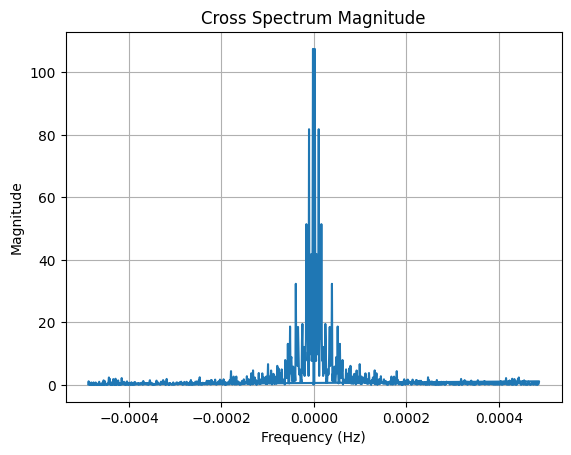

In [256]:
import numpy as np
import matplotlib.pyplot as plt


# Define sample signals
# T = 1/1024  # Sampling interval
# t = np.linspace(0.0, 1.0, 800)
# x = np.sin(50.0 * 2.0 * np.pi * t)
# y = np.sin(50.0 * 2.0 * np.pi * t + np.pi / 4)  # y is a phase-shifted version of x

# Calculate the cross spectrum
frequencies, cross_spectrum = calculate_cross_spectrum(x[0], x[1], T)

# Plot the magnitude of the cross spectrum
plt.figure()
plt.plot(frequencies, np.abs(cross_spectrum))
plt.title('Cross Spectrum Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


In [257]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example multivariable time series data
np.random.seed(0)
data = np.random.randn(1000, 3)  # 1000 observations of 3 time series

# Parameters
nfft = 256  # Number of FFT points

# Initialize a dictionary to hold the results
cross_psd_results = {}

# Compute cross-spectral densities for all pairs of time series
for i in range(data.shape[1]):
    for j in range(i, data.shape[1]):
        freq, Pxy = sm.tsa.multivariate_tools.coherence(data[:, i], data[:, j], nfft=nfft)
        cross_psd_results[f'PSD_{i+1}_{j+1}'] = (freq, Pxy)

# Print results for each pair of time series and plot the cross-PSD
for key, (frequencies, psd) in cross_psd_results.items():
    print(f"\n{key}:")
    print("Frequencies:", frequencies)
    print("Cross-PSD:", psd)

    # Plot the cross-PSD
    plt.figure()
    plt.plot(frequencies, np.abs(psd))
    plt.title(f'Cross-PSD {key}')
    plt.xlabel('Frequency')
    plt.ylabel('Cross-PSD')
    plt.show()



ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
import numpy as np
from scipy.fft import fft, ifft

def default_taper(N, parameter=None):
    # Default taper function (Hanning window)
    return np.hanning(N)

def create_tapered_series(ts, taper, center=True, recenter=False, normalize=False):
    # Center the time series
    if center:
        ts = ts - np.mean(ts)
    
    # Apply the taper
    ts_tapered = ts * taper
    
    # Recenter if needed
    if recenter:
        ts_tapered = ts_tapered - np.mean(ts_tapered)
    
    # Normalize if needed
    if normalize:
        ts_tapered = ts_tapered / np.sqrt(np.sum(taper**2))
    
    return ts_tapered

def acvs(ts, center=True):
    # Compute the autocovariance sequence
    N = len(ts)
    if center:
        ts = ts - np.mean(ts)
    acvs_est = np.correlate(ts, ts, mode='full') / N
    return acvs_est[N-1:]

def ts_to_lag_window_sdf_est(ts, m=None, taper_parameter=None, taper=default_taper, lag_window=None, center=True, recenter=False, normalize=False, delta_t=1, pad_factor=1):
    N = len(ts)
    
    # Step 1: Apply taper to the time series
    the_taper = taper(N, taper_parameter) if callable(taper) else taper
    ts_for_dft = create_tapered_series(ts, the_taper, center=center, recenter=recenter, normalize=normalize)
    
    # Step 2: Compute autocovariance sequence
    acvs_est = acvs(ts_for_dft, center=False)
    
    # Step 3: Create a 2-sided ACVS
    acvs_est_2_sided = N * np.concatenate([acvs_est[::-1][1:], acvs_est])
    Nm1 = N - 1
    
    # Step 4: Define the lag window
    if lag_window is None:
        lag_window = np.ones(2 * N - 1)
    elif callable(lag_window):
        lw = np.array([lag_window(k, m) for k in range(-Nm1, Nm1 + 1)])
    else:
        lw = np.concatenate([lag_window[::-1][1:], lag_window])
    
    # Step 5: Compute the DFT size and prepare for DFT
    N_dft = round(2 * N * pad_factor)
    M = N_dft // 2  # Number of nonzero frequencies
    for_dft = np.zeros(N_dft)
    
    # Step 6: Apply the lag window to the 2-sided ACVS
    lw_acvs = lw * acvs_est_2_sided
    for_dft[:N] = lw_acvs[N-1:2*N-1]
    for_dft[-(N-1):] = lw_acvs[:N-1]
    
    # Step 7: Compute the DFT
    dft_result = fft(for_dft)
    
    # Step 8: Prepare the results
    freqs = np.fft.fftfreq(N_dft, d=delta_t)[:M+1]
    sdfe = delta_t * np.real(dft_result[:M+1])
    
    return {
        'freqs': freqs,
        'sdfe': sdfe,
        'lw_2_sided': lw,
        'acvs': lw_acvs[N-1:]
    }

# Example usage:
time_series = np.random.randn(100)  # Example time series data
result = ts_to_lag_window_sdf_est(time_series, m=10)
print(result)


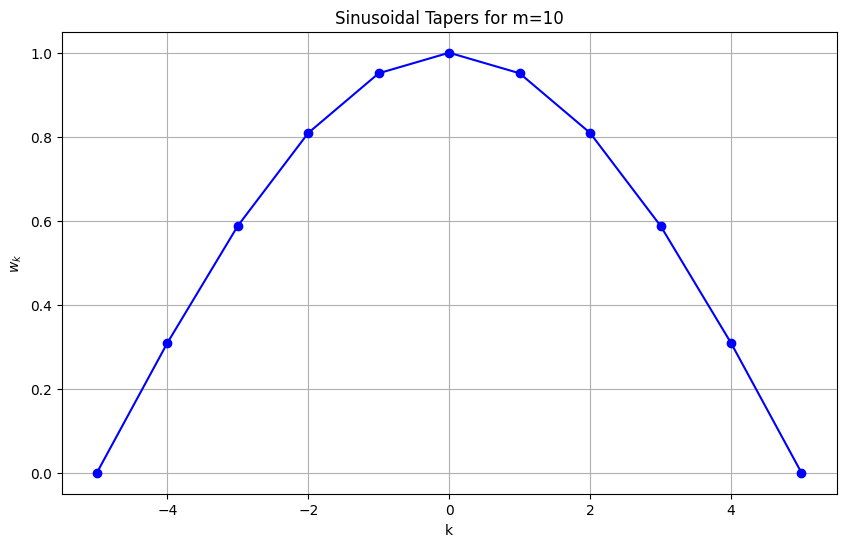

In [258]:
def plot_sinusoidal_tapers(m):
    """
    Plot the sinusoidal weights w_k = cos(pi * k / m).

    Parameters:
    m (int): Bandwidth parameter.
    """
    k_values = np.arange(-m//2, m//2 + 1)
    w_k = np.cos(np.pi * k_values / m)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, w_k, marker='o', linestyle='-', color='b')
    plt.xlabel('k')
    plt.ylabel(r'$w_k$')
    plt.title(f'Sinusoidal Tapers for m={m}')
    plt.grid(True)
    plt.show()

# Example usage:
plot_sinusoidal_tapers(10)

In [259]:
def smoothed_spectral_density(I, m):
    """
    Calculate the smoothed spectral density estimate using log-window with sinusoidal tapers.

    Parameters:
    I (np.ndarray): Periodogram of shape (num_series, num_series, num_frequencies).
    m (int): Number of tapers to use.

    Returns:
    f_hat (np.ndarray): Smoothed spectral density estimate of shape (num_series, num_series, num_frequencies).
    """
    num_series, _, num_frequencies = I.shape
    f_hat = np.zeros_like(I, dtype=complex)
    k_values = np.arange(-m//2, m//2 + 1)
    w_k = np.cos(np.pi * k_values / m)
    w_k /= np.sum(w_k)

    for f in range(num_frequencies):
        for i in range(num_series):
            for j in range(num_series):
                f_hat[i, j, f] = np.sum(I[i, j, :] * np.roll(w_k, f))
    return f_hat


In [260]:
def calculate_periodogram(X, taper=None, noise_level=1e-10):
    """
    Calculate the power spectral density matrix \hat{S}^{(P)}(f) for a given time series matrix X,
    with added noise to ensure the matrix is not singular.

    Parameters:
    X (numpy.ndarray): A 2D array where each row represents a time series.
    taper (numpy.ndarray): A 1D array to be multiplied element-wise to each time series.
    noise_level (float): The standard deviation of the Gaussian noise to be added.

    Returns:
    S_P (numpy.ndarray): The power spectral density matrix for each frequency.
    frequencies (numpy.ndarray): The frequency bins corresponding to the power spectral density.
    """
    N = X.shape[1]  # Number of time steps
    sqrt_N = np.sqrt(N)

    # Apply taper to each time series if provided
    if taper is not None:
        if taper.shape[0] != N:
            raise ValueError("The taper vector must have the same length as the time series.")
        X = X * taper
    else:
        X = X * 1 / sqrt_N

    # Compute the FFT for each time series
    W = np.fft.fft(X, axis=1)[:, :N // 2]

    # Add small Gaussian noise to W to avoid singularity
    # noise = np.random.normal(scale=noise_level, size=W.shape)
    # W += noise

    # Compute the frequencies
    frequencies = np.fft.fftfreq(N)[:N // 2]

    # Initialize the power spectral density matrix
    S_P = np.zeros((X.shape[0], X.shape[0], N // 2), dtype=np.complex_)

    # Calculate the power spectral density matrix for each frequency
    for i in range(N // 2):
        W_f = W[:, i]  # FFT values for the ith frequency
        S_P[:, :, i] = np.outer(W_f, np.conj(W_f).T)  # W(f) * W^H(f)

    return frequencies, S_P


def calculate_freq_avg_periodogram(x, m):
    """
    Calculate the smoothed spectral density estimate using log-window with sinusoidal tapers.

    Parameters:
    x (np.ndarray): time series (num_series, num_series, num_samples).
    m (int): Number of tapers to use.

    Returns:
    w_k (np.ndarray): Sinusoidal taper weights of shape (m,).
    f_hat (np.ndarray): Smoothed spectral density estimate of shape (num_series, num_series, num_frequencies).
    """

    frequences, I = calculate_periodogram(x)
    num_series, _, num_frequencies = I.shape

    f_hat = np.zeros_like(I, dtype=complex)
    k_values = np.arange(-m // 2, m // 2 + 1)
    w_k = np.cos(np.pi * k_values / m)
    
    print(np.sum(w_k))

    # Ensure weights sum to 1
    w_k /= np.sum(w_k)
    
    
     
    # First not complete
    for f in range(m//2):
        w_k_temp = w_k[(m//2-f):]
        w_k_temp/= np.sum(w_k_temp)
        weighted_sum = np.sum(I[:, :, : len(w_k_temp)] * w_k_temp, axis=2)
        f_hat[:, :, f] = weighted_sum     

    # Compete
    for f in range(num_frequencies - len(w_k) + 1):
        weighted_sum = np.sum(I[:, :, f:f + len(w_k)] * w_k, axis=2)
        f_hat[:, :, f + m//2] = weighted_sum
 
    # Last not complete
    for f in range(m//2):
        w_k_temp = w_k[:-(m//2-f)]
        w_k_temp/= np.sum(w_k_temp)
        
        weighted_sum = np.sum(I[:, :, -len(w_k_temp):] * w_k_temp, axis=2)
        f_hat[:, :, -f-1] = weighted_sum
 
    return w_k, f_hat, frequences

In [261]:
_, new, frequencies =calculate_freq_avg_periodogram(x, 100)
new.shape

63.65674116287158


(3, 3, 512)

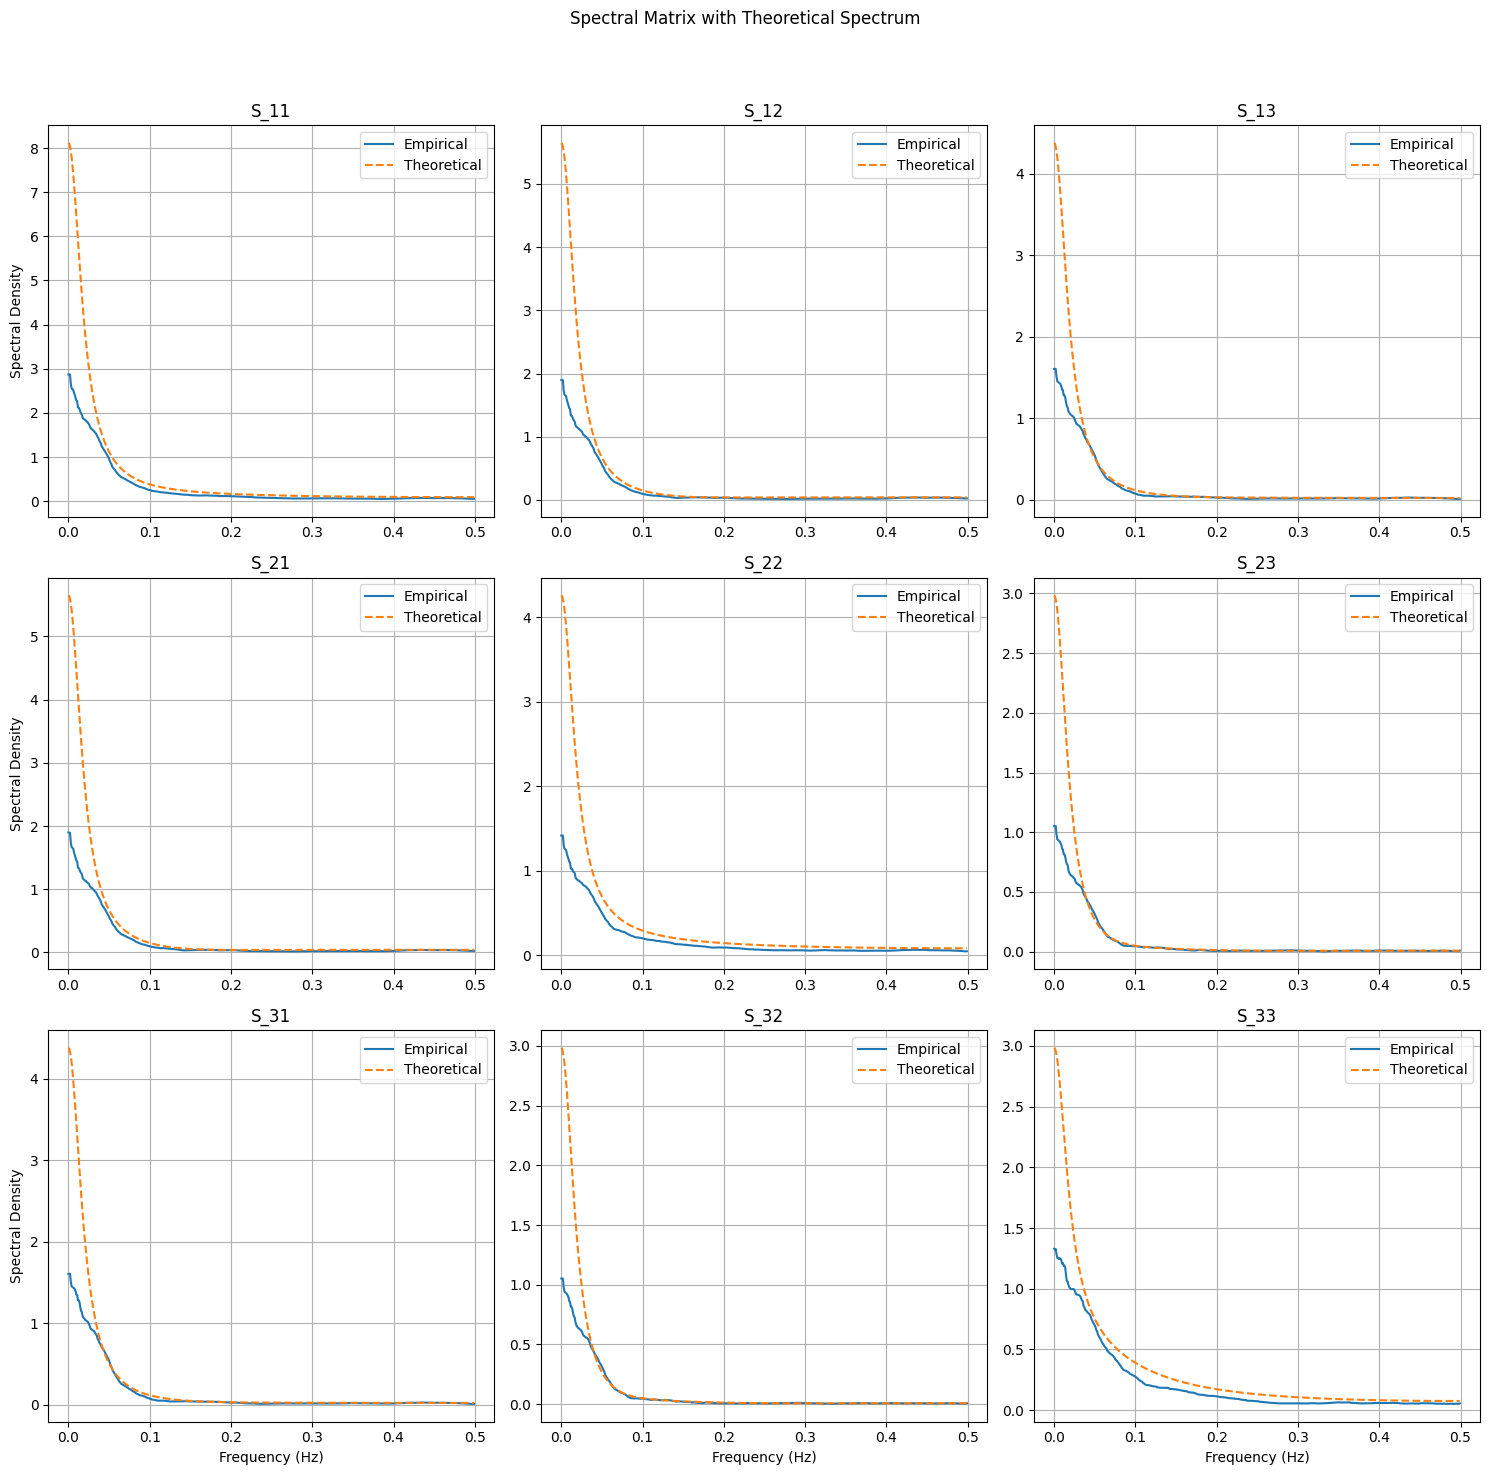

In [262]:
plot_sdf_with_theoretical(frequencies, new, theory_spectrum, log_scale = False)

63.65674116287158
(101,)


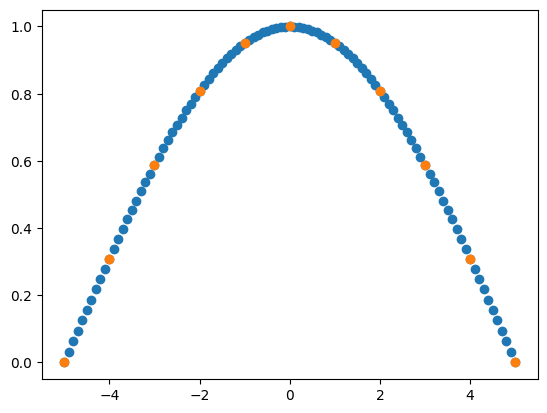

In [213]:
m = 100
k_values = np.arange(-m // 2, m // 2+1)
w_k = np.cos(np.pi * k_values / m)

print(np.sum(w_k))
print(w_k.shape)
plt.scatter(k_values/10, w_k)

m = 10
k_values = np.arange(-m // 2, m // 2+1)
w_k = np.cos(np.pi * k_values / m)
plt.scatter(k_values, w_k)

plt.show()



In [193]:
np.cos(np.pi/2)

6.123233995736766e-17